In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

# Review of Main Course Topics

### A couple of highlights before we go in details:

- Python is an intuitive language: most commands are exactly what you would say (list--> list; print--> print(); interpolate --> interp; etc)
- Unlike other languages (e.g., C, FORTRAN) Python is interpreted (no compiler needed)
- Has no declarations 
- Does the memory management under the hood 
- Widely used in science and industry, so it has a lot of already developed routines for numerical and science problems
- It's free!
- Can easily interact with modules from other languages (C/Fortran) i.e. Cython
- Can do network programming, encryption, databases, ML --> super useful in industry and science!
- Python has a wealth of functions to do what you want (numpy, scipy ....)


### Most of the things you want to do have probably already been done by someone. If you are stuck, don't try to reinvent the wheel: search python.org, numpy.org, scipy.org, matplolib.org, stackoverflow.com etc for a solution from someone else

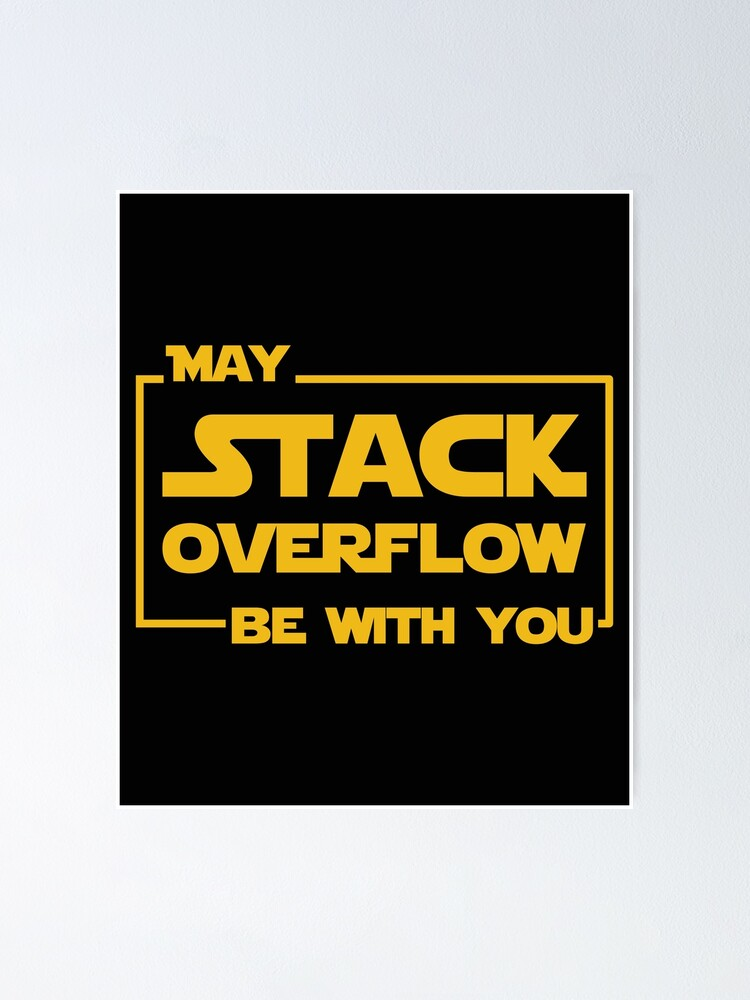

### Import all the packages you need at the start of your code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### sometimes you might not need the whole package, but one function out of it:

In [2]:
from scipy.stats import chisquare

### or you might want to import functions from a .py file you stored them in:

In [35]:
from my_functions import F2C


In [36]:
print(F2C(212))

100.0


## A) Keeping a good work log is good practice. Also important for coding is to keep good comments in your code

## B) Python has data types that are:
- *mutable*: lists, numpy arrays, dictionaries 
- and *immutable*: tuples, strings. 

What does it means that they are mutable?

In [37]:
#Create a list x:
x = [1,2,3]
print(type(x))
#Slice the element stored at i = 2:
x[2] = 0
print(x)

y = (1,2,3)
print(type(y))
try:
    y[2] = 0
except:
    print("Tuples are immutable!",y)

<class 'list'>
[1, 2, 0]
<class 'tuple'>
Tuples are immutable! (1, 2, 3)


## C) Slicing

Every time you want to access part of your array, list, tuple etc you are slicing your array,....

### Important to remember: 
- Python starts counting from 0!
- when slicing you START_AT : UP_TO_AND_NOT_INCLUDING: WITH_A_STEP_OF
- if you leave the START or UP_TO empty it is going from start, or to end of array/list/..

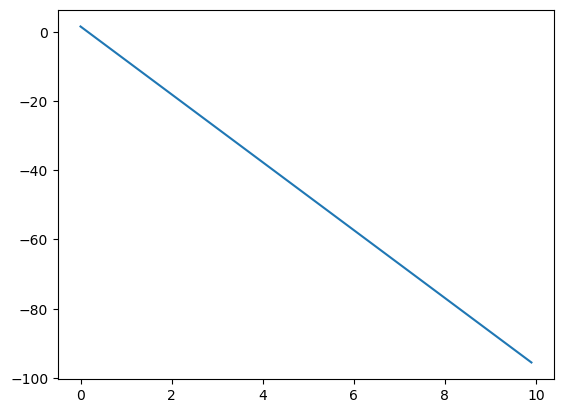

In [45]:
#Create some data for a projectile moving in the y direction:
dt = 0.1
t = np.arange(0,10.1,dt)
y = 5 + 2*t - 0.5*9.8*t**2
#Use some clever slicing to get the velocity using the backward difference:
#Get dy = y[i] - y[i-1]:
dy = y[1:] - y[0:-1]
v = dy/dt
plt.plot(t[0:-1],v)






### 1D/ 2D/3D/ND cases:
**1D case:**

In [3]:
my_list = [ 1, 2, 3, 4, 10, 12, 14, 16 ]

In [4]:
# get elements 3, 4, 10 ; then get element 16:

print( my_list[ 2: 5 ]  )
print( my_list[5:2: -1 ] )

[3, 4, 10]
[12, 10, 4]


In [5]:
# get elements starting from 2, with a step of 2:

print( my_list[ 1: : 2 ])

[2, 4, 12, 16]


**2D case**

In [46]:
twodim_array = np.reshape( np.linspace( 1, 10, 24 ), (4,6) )

In [47]:
print( twodim_array )

[[ 1.          1.39130435  1.7826087   2.17391304  2.56521739  2.95652174]
 [ 3.34782609  3.73913043  4.13043478  4.52173913  4.91304348  5.30434783]
 [ 5.69565217  6.08695652  6.47826087  6.86956522  7.26086957  7.65217391]
 [ 8.04347826  8.43478261  8.82608696  9.2173913   9.60869565 10.        ]]


**Let's slice 2D the array**

In [48]:
# get the data of the first line :

print( twodim_array[ 0, : ] )

[1.         1.39130435 1.7826087  2.17391304 2.56521739 2.95652174]


In [49]:
# get the data of the second column:

print( twodim_array[ :, 1 ] )

[1.39130435 3.73913043 6.08695652 8.43478261]


In [10]:
# get the data :
# 3.73913043  4.13043478  4.52173913
# 6.08695652  6.47826087  6.86956522

print( twodim_array[ 1:3, 1:4 ] )

[[3.73913043 4.13043478 4.52173913]
 [6.08695652 6.47826087 6.86956522]]


## D) For things that you want to do repeatedly you can create your own functions. You can store them in a .py file if you will use them more often. 

### Modules are packages of functions.

In [50]:
def my_function( a, b, kwarg = None ):
    """Writting an informative docstring is super important. It will help you later on to 
    remember what your function is supposed to be doing. 
    Input: a, b parameters
    Output: parameter c 
    kwarg is a keyword argument"""
    
    q = np.log( a ) + b
    
    return q

The variable names you use in your main code can be different from the ones in the funct; just make sure that you keep the consistent in either block of code 

In [51]:
print(my_function(1,2))

a1 = np.linspace( 4, 8, 20 )
a2 = a1 ** 2

s = my_function( a1, a2 )

print( s )

2.0
[17.38629436 19.16611951 21.03208419 22.98442138 25.02333298 27.14899508
 29.36156223 31.66117076 34.04794156 36.52198233 39.08338944 41.73224944
 44.46864037 47.29263284 50.20429092 53.20367297 56.29083225 59.46581753
 62.72867357 66.07944154]


## E) *If*, *For* and *While* statements are powerful for controlling the flow of data in your program. 

**for:** for things that you want to do in a repetitive pattern (e.g., go through every element of list and multiply it by 2)

In [13]:
a = [ 2, 4, 5,  8, 11, 12, 14, 16, 21, 24 ]
b = np.zeros(len(a))
for i in range( len( a ) ):
    a[ i ] = a[ i ] * 2
    b[i] = np.sqrt(a[i])
print( a, b )



[4, 8, 10, 16, 22, 24, 28, 32, 42, 48] [2.         2.82842712 3.16227766 4.         4.69041576 4.89897949
 5.29150262 5.65685425 6.4807407  6.92820323]


In [52]:
# you can scan directly the list with:
for i, number in enumerate(a):
    print( i, number )


0 4
1 8
2 10
3 16
4 22
5 24
6 28
7 32
8 42
9 48


In [46]:
for i in range( len( a ) ):
    print( a[ i ] )

4
8
10
16
22
24
28
32
42
48


In [53]:
for i in range(len(a)):
    if i % 2 == 0 :
        print( i, ' is even' )
    else: 
        print( i, ' is odd')
    

0  is even
1  is odd
2  is even
3  is odd
4  is even
5  is odd
6  is even
7  is odd
8  is even
9  is odd


In [56]:
b = [ 2, 4, 5,  8, 11, 12, -4, 14, 16, 21, 24 ]

i = 0

while b[ i ] > 0 :
    print( b[ i ] )
    i+=1


for i in range(len(b)):
    if b[i] > 0:
        print(b[i])
    else:
        break

2
4
5
8
11
12
2
4
5
8
11
12


### Remember that *numpy* may not need FOR loops! If you can use numpy go for it!

In [57]:
# get two numpy arrays and multiply them element by element:
n1 = np.arange( 0, 11, 2 )
n2 = np.arange( 10, 21, 2 )

#we don't need FOR, numpy is smart enough to do it for us!
n3 = np.sum(n2 * n1)
n4 = np.dot(n2,n1)

In [58]:
print( n3 )
print(n4)

520
520


**if:** for conditional things (e.g., only need to multiply elements of a list by 2  IF they are odd, and if they are even and NOT 4 multiply by 3)

In [71]:
list1 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8]
arr1 = np.array(list1)

In [72]:

#it's a repetitive thing, so I start with a for:
for i in range( len( list1) ):
    #now comes the condition:
    if list1[ i ] % 2 == 1:
        list1[ i ] = list1[ i ] * 2
    #then I have another condition:
    elif (list1[ i ] % 2 == 0) & ( list1[ i ] != 4 ) :
        list1[ i ] = list1[ i ] * 3
    #if I have other elements they would go to the else; in this case it just stays as is :
    else:
        list1[ i ] = list1[ i ]


In [73]:
print( list1 )

[0, 2, 6, 6, 4, 10, 18, 14, 24]


In [74]:

odd = np.where(arr1 % 2 ==1)
even_not_four = np.where((arr1 % 2 == 0) & (arr1 != 4))

arr1[odd]*=2
arr1[even_not_four]*=3

for i in range(len(list1)):
    print(arr1[i] - list1[i])

0
0
0
0
0
0
0
0
0


## F) Bugs are an inevitability, but you can use some tricks to make your life easier:
- When creating your code make sure you test it often and with different test cases. Smaller batches are much easier to debug than larger ones.
- Once you see there is a bug, debug: print() variables or use Python's debugger:
- Make sure to  `import pdb`
- Then use `pdb.set_trace()` to set a breakpoint in your code


Sometimes bugs will make your code seem to run as it should, but results don't make sense:

In [78]:
# e.g., we saw how a typo can be a bug:
import pdb
def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volumee = (4./3.) * np.pi * (radius**3)   #----typo!
    pdb.set_trace()
    try:
        return(volume)
    except:
        print("No volume to return")
    

print( volume( 10 ) )


> /var/folders/k4/29_257m513zg9w42bfwk5d400000gn/T/ipykernel_55933/2741189841.py(11)volume()
      9     volumee = (4./3.) * np.pi * (radius**3)   #----typo!
     10     pdb.set_trace()
---> 11     return(volume)
     12 
     13 print( volume( 10 ) )



ipdb>  print(volume)


<function volume at 0x157dda020>


ipdb>  print(volumee)


4188.790204786391


ipdb>  q


In [80]:
# or how an accidental omission can make the code appear to work, while it doesnt:

num = int(input("Give me a number:"))

if num == 10 or num == 1:
    print('the number is 10 or 1')
else:
    print('the number is not 10 or 1')


Give me a number: 5


the number is not 10 or 1


Sometimes bugs will make your code crash:

In [81]:
def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volume = (4./3.) * np.pi * (radius**3)   #----typo!
    
    print( 'the volume is, volume )
    
    return(volume)


SyntaxError: unterminated string literal (detected at line 9) (729909075.py, line 9)

Often bugs can be associated with the indentation of your code:

In [82]:
# make code that scans array F and prints the last value at each step 
# and the mean of the array up to that point:

F = np.linspace( 1, 12, 20)
print( F )

[ 1.          1.57894737  2.15789474  2.73684211  3.31578947  3.89473684
  4.47368421  5.05263158  5.63157895  6.21052632  6.78947368  7.36842105
  7.94736842  8.52631579  9.10526316  9.68421053 10.26315789 10.84210526
 11.42105263 12.        ]


In [87]:
for i in range( len( F ) ):
    print( F[ i ] , np.mean( F[ : i +1 ] ) )

1.0 1.0
1.5789473684210527 1.2894736842105263
2.1578947368421053 1.5789473684210524
2.736842105263158 1.8684210526315788
3.3157894736842106 2.1578947368421053
3.8947368421052633 2.4473684210526314
4.473684210526316 2.736842105263158
5.052631578947368 3.026315789473684
5.631578947368421 3.3157894736842106
6.210526315789474 3.605263157894737
6.7894736842105265 3.8947368421052633
7.368421052631579 4.18421052631579
7.947368421052632 4.473684210526316
8.526315789473685 4.7631578947368425
9.105263157894736 5.052631578947369
9.68421052631579 5.342105263157895
10.263157894736842 5.63157894736842
10.842105263157896 5.921052631578947
11.421052631578949 6.210526315789473
12.0 6.5


## G) When you are interested in doing numerical or scientific computations you have **numpy** and **scipy** at your disposal. 

In [88]:
a = np.loadtxt('a_scatter_plot.dat')
print(a)

[[-0.9 -0.9 -0.9]
 [-0.9 -0.9 -0.8]
 [-0.9 -0.9 -0.7]
 ...
 [ 0.8  0.8  0.6]
 [ 0.8  0.8  0.7]
 [ 0.8  0.8  0.8]]


In [89]:
# slice the data array and assign each column to a named variable:
wav = a[ :, 0 ]
f1  = a[ :, 1 ]
f2  = a[ :, 2 ]

In [90]:
# you can now do all shorts of things to your data:
print( wav,  f1 )
print( 3 * f2[ 10 ] - 2 * f1[ 10 ] )

[-0.9 -0.9 -0.9 ...  0.8  0.8  0.8] [-0.9 -0.9 -0.9 ...  0.8  0.8  0.8]
2.1


In [91]:
b = np.array( [ [ 2, 3 ], [ 5, 4 ] ])

c = np.linspace(1, 16, 6).reshape((3, 2))

In [92]:
print( b )

print( c )

[[2 3]
 [5 4]]
[[ 1.  4.]
 [ 7. 10.]
 [13. 16.]]


### you can even fit models to data:

[ 8.47710097 12.12786428  0.38386397  6.03149633 13.20347075  5.80155214]


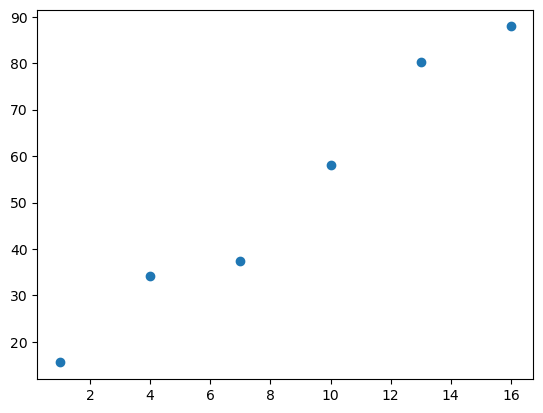

In [93]:
# you have observations:



x = np.linspace( 1, 16, 6 )

noise = np.random.rand(len(x))*20.
print(noise)
y = 5 * x  + 2.1 + noise

plt.scatter(x,y)

#what is the best fit model a * x + b ?


from scipy.optimize import curve_fit



In [94]:
def myfunct( x, a, b ):
    """fits your function"""
    
    return a * x + b

s1, v1 = curve_fit( myfunct, x, y, absolute_sigma = True, sigma = np.zeros( len( x ) ) + 2 )
print( s1 )

[ 4.95711151 10.13544357]


In [97]:
# or if you want to do it manually:

a1 = np.arange( 1, 10, 0.05 )
a2 = np.arange( 1, 10, .05 )

chs = np.zeros( ( len( a1 ), len( a2 ) ) )

for i in range( len( a1 ) ):
    for j in range( len( a2 ) ):
        ym = a1[ i ] * x + a2[ j ]
        chs[ i, j ] = np.sum( ( ym - y ) ** 2. / ym**2 )


mn = np.where( chs == np.min( chs ) )

print( a1[ mn[ 0 ] ], a2[ mn[ 1 ] ] )


[5.05] [9.95]


## H) Good plots are important to show your results and convey your mesage to your audience

### For most plots the basic plt will work just fine.

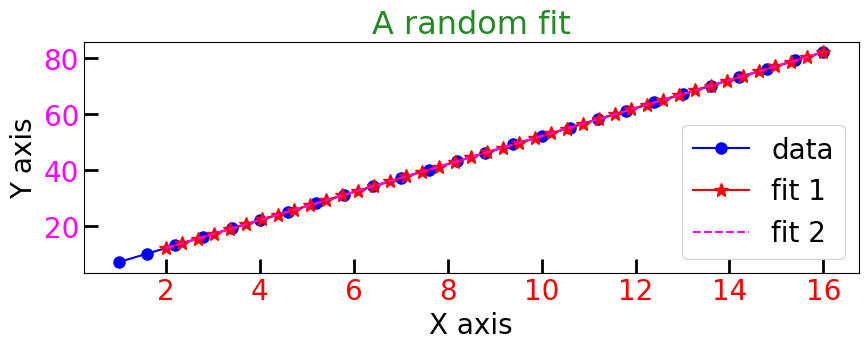

In [98]:
# you have observations 
x = np.linspace( 1, 16, 26 )
y = 5 * x  + 2.1

# you now have another observation at different x points
x2 = np.linspace( 2, 16, 42 )
y2 = 5 * x2  + 2.1

# and you want to test if they are coming from the same distribution

#first interpolate y from the x to the x2 grid so that we compare apples to apples:
yb = np.interp( x2, x, y)


#then plot to compare:

plt.figure( figsize = ( 10, 3 ) )
plt.plot( x, y , color = 'blue' , marker = 'o', markersize = 8 , label = 'data')
plt.plot( x2, y2, color = 'red' , marker = '*', markersize = 10, label = 'fit 1' )

plt.plot( x2, yb, color = 'magenta', linestyle = '--', label = 'fit 2')

plt.xlabel( 'X axis', fontsize = 20 )
plt.ylabel( 'Y axis', fontsize = 20 )
plt.legend( fontsize = 20 , loc = 'lower right' )

plt.xticks( fontsize = 20 , color = 'red'     )
plt.yticks( fontsize = 20 , color = 'magenta' )
plt.title( 'A random fit', fontsize = 23, color = 'forestgreen' )

plt.tick_params( which = 'both', direction = 'in' , width = 2, length = 10 )

### If you want more complex plots (side by side, one on top of another, double x or y axis etc) you need to use the advanced plotting method with ax

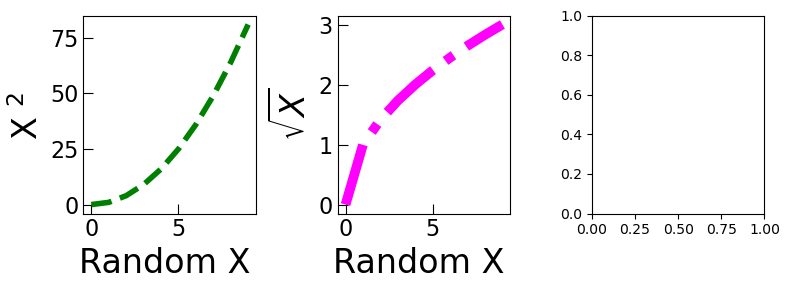

In [102]:
fig, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3 , figsize = (8, 3 ) )

ax1.plot( np.arange( 10 ) , np.arange( 10 )**2, color = 'green', linestyle = '--' , linewidth = 4 )
ax1.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
ax1.set_xlabel( 'Random X ' , fontsize = 24 )
ax1.set_ylabel( 'X $^2$ ' , fontsize = 24 )

ax2.plot( np.arange( 10 ) , np.arange( 10 )**0.5, color = 'magenta', linestyle = '-.' , linewidth = 7 )
ax2.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
ax2.set_xlabel( 'Random X ' , fontsize = 24 )
ax2.set_ylabel( '$\\sqrt{X}$ ' , fontsize = 24 )
plt.tight_layout()

### or if, like here, you want them to share the x axis:

Text(0, 0.5, '$\\sqrt{X}$ ')

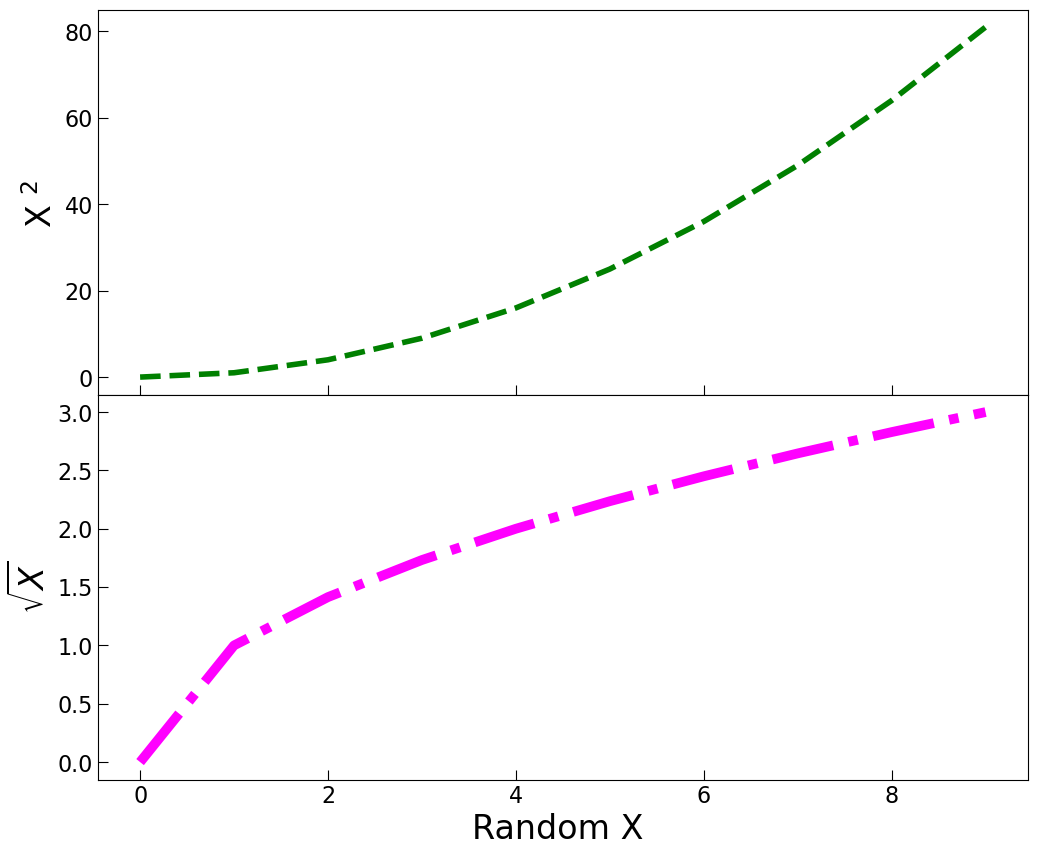

In [60]:
fig, axs = plt.subplots( 2, sharex = True, gridspec_kw={'hspace':0}, figsize =( 12, 10) )

axs[0].plot( np.arange( 10 ) , np.arange( 10 )**2, color = 'green', linestyle = '--' , linewidth = 4 )
axs[0].tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
axs[0].set_xlabel( '  ' , fontsize = 24 )
axs[0].set_ylabel( 'X $^2$ ' , fontsize = 24 )

axs[1].plot( np.arange( 10 ) , np.arange( 10 )**0.5, color = 'magenta', linestyle = '-.' , linewidth = 7 )
axs[1].tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
axs[1].set_xlabel( 'Random X ' , fontsize = 24 )
axs[1].set_ylabel( '$\\sqrt{X}$ ' , fontsize = 24 )


### when you want to get plotting things in 3D remember to import: 
from mpl_toolkits.mplot3d import Axes3D

In [108]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### then you can do things like:

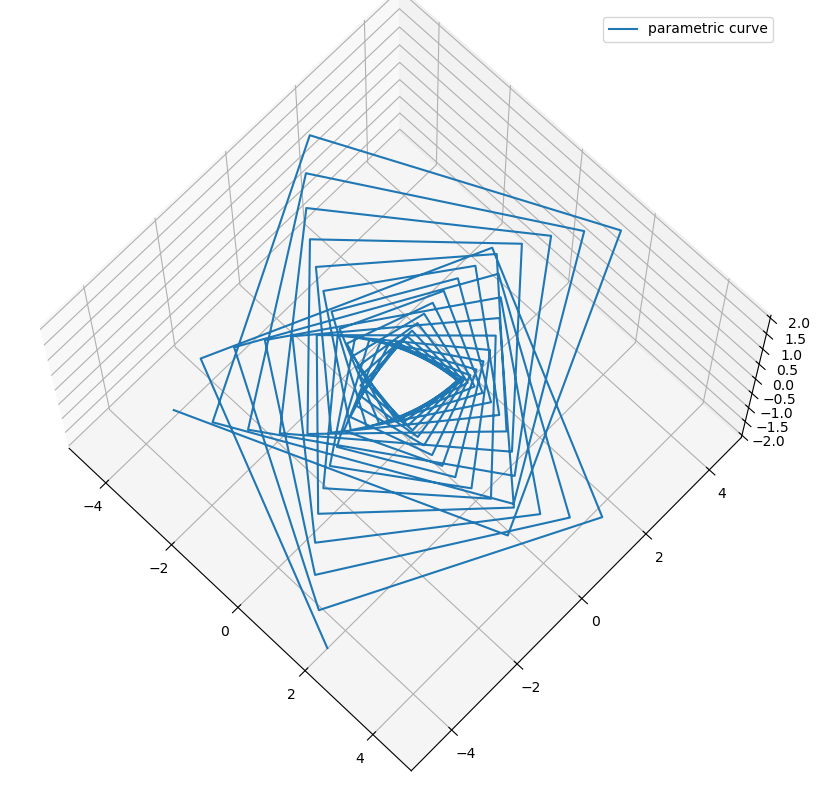

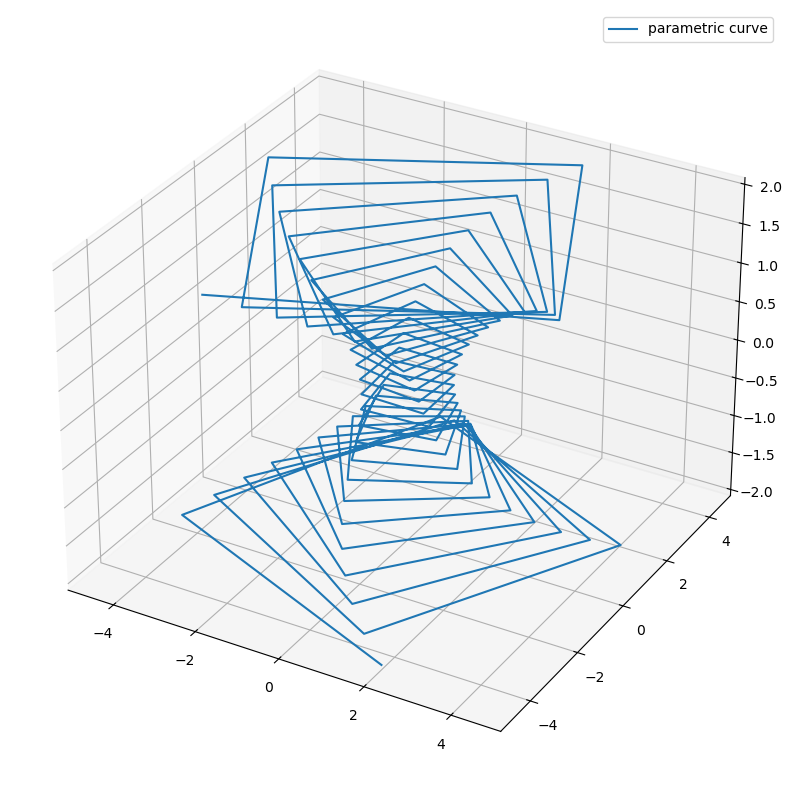

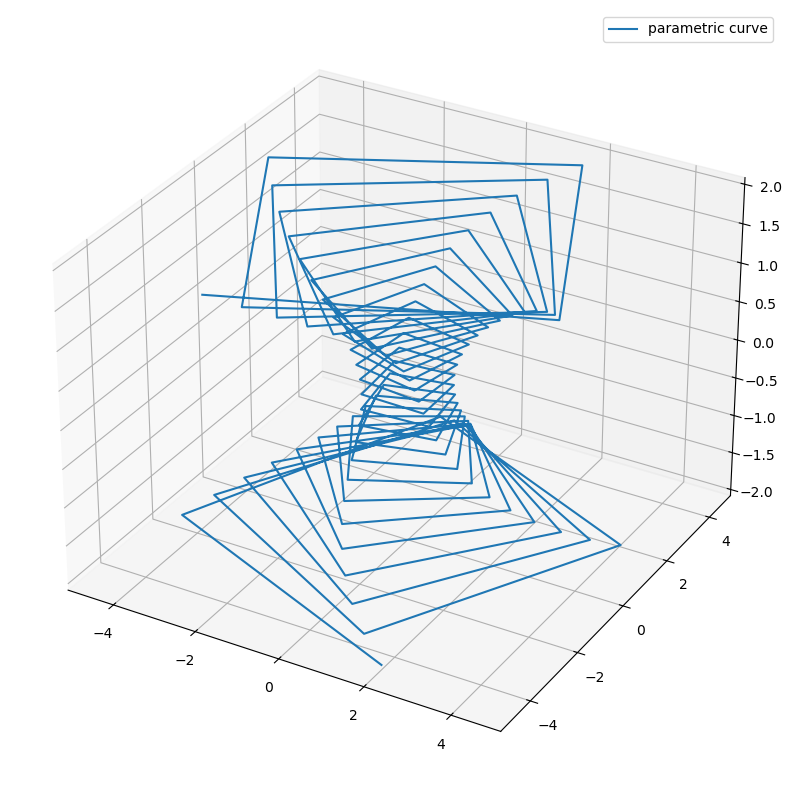

In [110]:
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(2*np.pi*theta)
y = r * np.cos(2*np.pi*theta)


fig = plt.figure( figsize = ( 10, 10 ) )
ax = plt.axes(projection='3d')
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [64]:
data = np.loadtxt( 'a_scatter_plot.dat')
x = data[:,0]
y = data[:,1]
z = data[:,2]

In [91]:
#hard to see what happens in 2d: plot it out using 3 different colors for each combi:


In [92]:
#now, plot it in 3D:


### You can also use interactive plotting outside of the notebook:
use `%matplotlib`
to get back use `%matplotlib inline`

In [32]:
%matplotlib

Using matplotlib backend: MacOSX


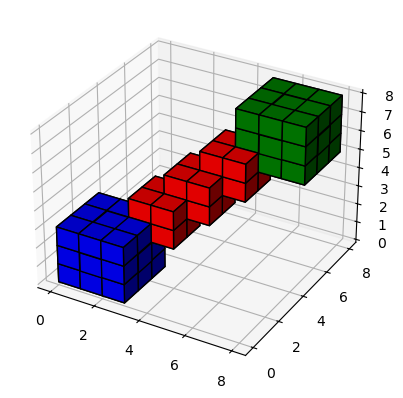

In [36]:
#from https://matplotlib.org/stable/gallery/mplot3d/voxels.html

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxelarray = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

plt.show()

In [3]:
%matplotlib

Using matplotlib backend: macosx


In [4]:
'''
======================
Triangular 3D surfaces
======================

Plot a 3D surface with a triangular mesh.
From https://matplotlib.org/2.0.2/mpl_examples/mplot3d/trisurf3d_demo.py
'''


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)


### Remember to turn back to non-interactive mode with:

In [6]:
%matplotlib inline

### Sometimes you will have data that you want to contour plot (2D + 1D in color). 

In [12]:
data = np.loadtxt('whatsinthefile.dat')
data = np.flip( data, 0)

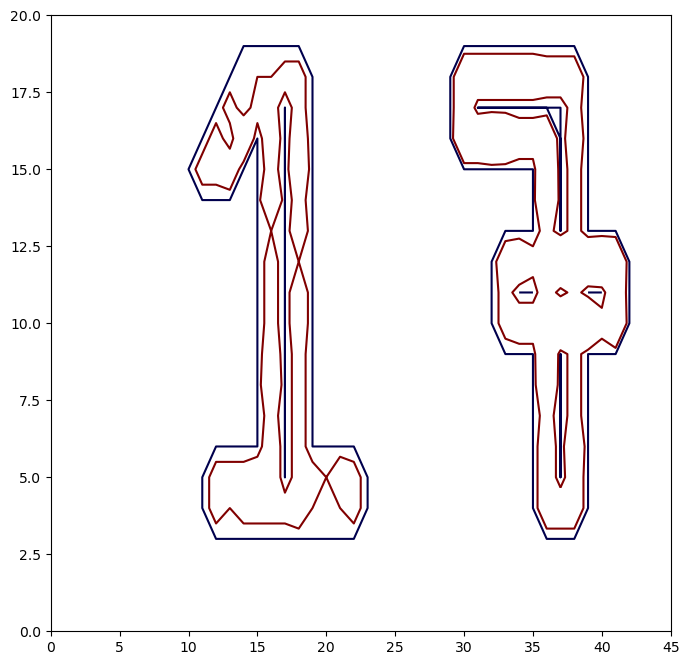

In [13]:
plt.figure( figsize = (8,8) )
plt.contour( data ,[0,1],cmap = 'seismic')
plt.show()

## I) Last, but not least, you will often need to fit data with models. Python offers premade functions to do this such as curvefit, leastsq, polyfit (for polynomials). You can also do a brute-force parametric scan.

In [14]:
x = np.array( [ 12., 12.54, 13.07, 13.61, 14.15, 14.68, 15.22 , 15.76, 16.29, 16.83, 17.37, 17.90,
 18.44, 18.98, 19.51, 20.05, 20.58, 21.12, 21.66, 22.21, 22.73, 23.27, 23.80, 24.34,
 24.88, 25.41, 25.95, 26.48, 27.02, 27.56, 28.11, 28.63, 29.17, 29.71, 30.24, 30.78,
 31.32, 31.85, 32.39, 32.93, 33.46, 34. ] )
y = np.array( [1137.61, 1174.34, 1209.87, 1244.19, 1277.31,
 1309.21, 1339.93, 1369.39, 1397.67, 1424.74, 1450.61, 1475.25, 1498.69, 
 1520.90, 1541.94, 1561.75, 1580.35, 1597.72, 1613.93, 1628.91, 
 1642.67,  1655.22, 1666.57, 1676.711, 1685.63, 1693.35,  1699.92, 
 1705.16, 1709.25, 1712.14, 1713.81, 1714.27, 1713.48, 1711.57, 1708.41, 
 1704.04, 1698.45, 1691.66, 1683.66, 1674.44, 1664.02, 1652.40       ])
y_err = np.array( [21.7319576 , 22.43361705, 23.11235269, 23.7679735 , 24.4006705 ,
       25.01006163, 25.59691102, 26.15969042, 26.69992808, 27.2170509 ,
       27.71124992, 28.18195203, 28.62973035, 29.05401176, 29.45594246,
       29.83437627, 30.18969524, 30.5215173 , 30.8311797 , 31.11734519,
       31.38020481, 31.6199496 , 31.83677058, 32.03049583, 32.20087701,
       32.34835348, 32.47386131, 32.57396192, 32.65209389, 32.70730205,
       32.73920435, 32.74799181, 32.7329003 , 32.69641325, 32.63604723,
       32.55256637, 32.44577965, 32.31606913, 32.16324376, 31.98711253,
       31.7880575 , 31.56607866])

In [15]:
#y += np.random.rand(len(y))*100.
plt.errorbar( x,y, yerr= y_err,marker = 'o', linestyle ='none',markersize = 5)
print(len(x))


42


### We know that the underlying model is of the form: $a * x**2 + b *x +c $   
### Let's do a brute-force fit limiting $a\in [ -20, 20)$  with a step of 0.1, $b\in[0.1, 140)$ with a step of 10. and $c\in[0, 1.5) $ with a step of 0.1:

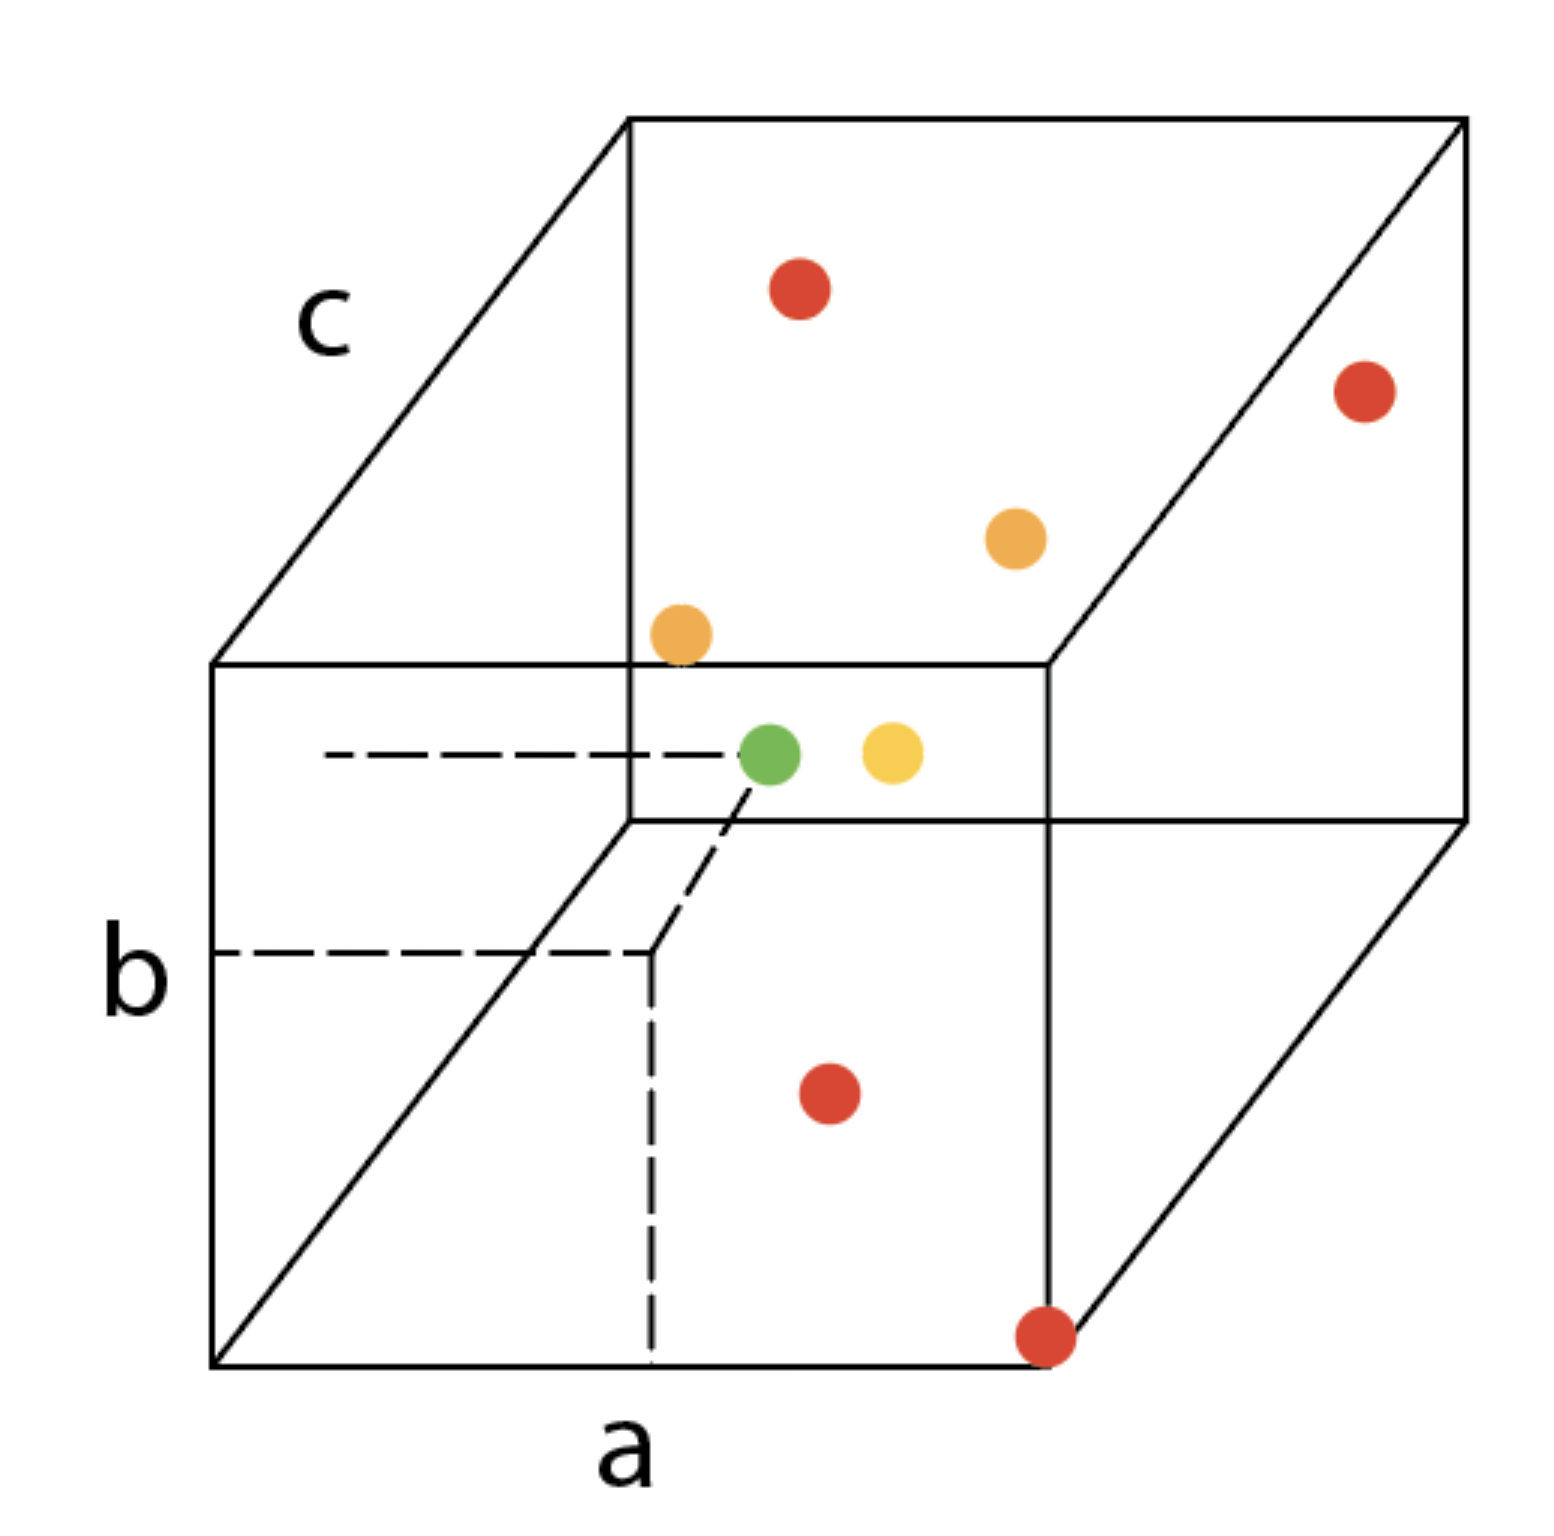

In [16]:
a = np.arange( -20, 20, 0.1)
b = np.arange( 0.1, 140 , 10. )
c = np.arange( 0., 1.5, 0.1 )

chsq = np.zeros((len(a),len(b),len(c)))
#fit here:
for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            #my model:
            y_model = a[i]*x**2 + b[j]*x + c[k]
            #goodness of fit:             
            dof = 40 #deg of freedom: 42 - (3 - 1) = 40
            chsq[i,j,k] = np.sum((y - y_model)**2/y_err**2)/dof
            

In [17]:
print( np.min( chsq ))
min_loc = np.where( chsq == np.min( chsq ) )
print( min_loc )

0.006375620861884289
(array([179]), array([12]), array([0]))


In [18]:
print( 'The best model is: ', a[ min_loc[ 0 ] ] , '*x$^2$ +', b[ min_loc[1] ] , '*x + ', c[ min_loc[2]] , '.')

The best model is:  [-2.1] *x$^2$ + [120.1] *x +  [0.] .


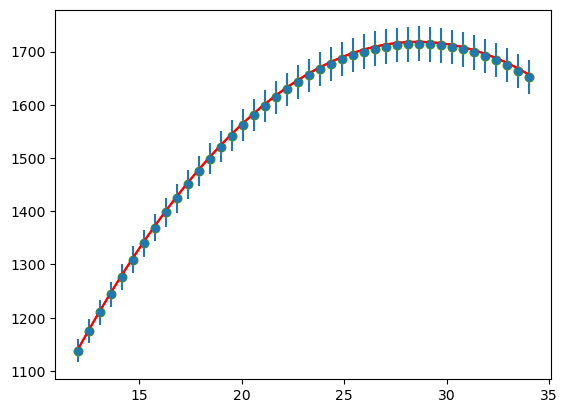

In [20]:
plt.plot( x,y, marker = 'o', linestyle ='none')
plt.plot( x, a[ min_loc[ 0 ] ]* x**2 + b[ min_loc[ 1 ] ] *x  + c[ min_loc[ 1 ] ] , color = 'red')
plt.show()

### or using curvefit:

In [83]:
def fit_my_curve( x, a, b, c ):
    
    print( 'a=', a, 'b=', b, 'c=', c)
    
    return a*x**2 + b *x + c

In [84]:
x1, x2 = curve_fit( fit_my_curve, x, y, sigma = np.ones( len( x )) * 10 )

a= 1.0 b= 1.0 c= 1.0
a= 1.0 b= 1.0 c= 1.0
a= 1.0 b= 1.0 c= 1.0
a= 1.0000000149011612 b= 1.0 c= 1.0
a= 1.0 b= 1.0000000149011612 c= 1.0
a= 1.0 b= 1.0 c= 1.0000000149011612
a= -2.1001289613217624 b= 120.00735769064086 c= -0.11027068791631911
a= -2.1001289300274024 b= 120.00735769064086 c= -0.11027068791631911
a= -2.1001289613217624 b= 120.00735947888984 c= -0.11027068791631911
a= -2.1001289613217624 b= 120.00735769064086 c= -0.11027068627315781
a= -2.1001264973654554 b= 120.00724262211018 c= -0.10911095248727212
a= -2.100126466071132 b= 120.00724262211018 c= -0.10911095248727212
a= -2.1001264973654554 b= 120.00724441035744 c= -0.10911095248727212
a= -2.1001264973654554 b= 120.00724262211018 c= -0.10911095086139223
a= -2.1001264972715155 b= 120.0072426178035 c= -0.10911101937193562


### There is also `np.polyfit` for fitting $n^{th}$ degree polynomials: 

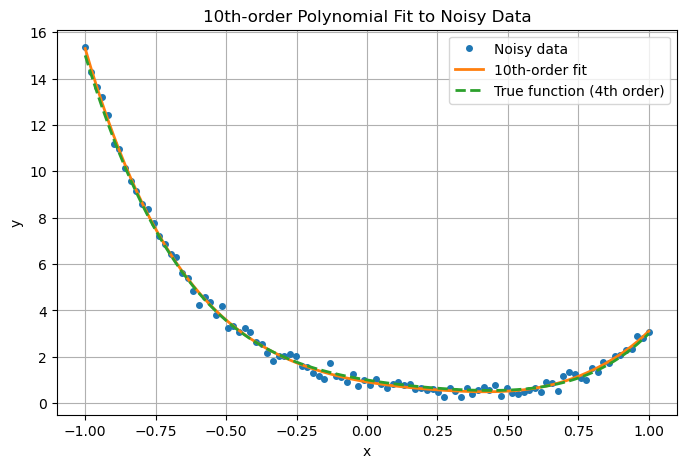

In [21]:
# Create some sample data
np.random.seed(0)
x = np.linspace(-1, 1, 100)
y_true = 1 - 2*x + 3*x**2 - 4*x**3 + 5*x**4  # Underlying polynomial (4th order)
noise = 0.2 * np.random.randn(len(x))
y_noisy = y_true + noise

# Fit a 10th-order polynomial to the noisy data
coeffs = np.polyfit(x, y_noisy, deg=10)

# Evaluate the fitted polynomial
p = np.poly1d(coeffs)
y_fit = p(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y_noisy, 'o', label='Noisy data', markersize=4)
plt.plot(x, y_fit, '-', label='10th-order fit', linewidth=2)
plt.plot(x, y_true, '--', label='True function (4th order)', linewidth=2)
plt.legend()
plt.title("10th-order Polynomial Fit to Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


https://www.kaggle.com/

UCF Data Analytics and Visualization Boot Camp (https://bootcamp.ce.ucf.edu/data/online/landing/?s=Google-Unbranded&dki=Become%20a%20Data%20Scientist&msg_cv_scta=4&msg_cv_stbn=1&msg_cv_fcta=1&pkw=how%20to%20data%20scientist&pcrid=458645039223&pmt=e&utm_source=google&utm_medium=cpc&utm_campaign=GGL%7CUCF%7CSEM%7CDATA%7C-%7CONL%7CTIER-1%7CALL%7CNBD-G%7CEXACT%7CCore%7CExploratory&utm_term=how%20to%20data%20scientist&s=google&k=how%20to%20data%20scientist&utm_adgroupid=110879426601&utm_locationphysicalms=9011804&utm_matchtype=e&utm_network=g&utm_device=c&utm_content=458645039223&utm_placement=&gclid=Cj0KCQjw1PSDBhDbARIsAPeTqrdDObxPmycETFrUDHdrwYchO0fBEpnyCZ9TnjJ5dImRYpzomF1nOwYaAuwuEALw_wcB&gclsrc=aw.ds)

# SymPy
Sympy is a Python library for **symbolic mathematics**, meaning it can **manipulate algebraic expressions exactly** instead of approximately (as NumPy does with floating point numbers).

In this notebook, you’ll learn:
- How to define symbolic variables and expressions
- How to simplify and expand expressions
- How to take derivatives and integrals
- How to solve equations symbolically
- How to render LaTeX output


In [22]:
# Import SymPy
import sympy as sp

# Enable pretty printing for output
sp.init_printing()

### Defining Symbols and Expressions

We use `symbols()` to define symbolic variables. Let's create variables `x`, `y`, and `z` and define a simple expression.


In [23]:
x, y, z = sp.symbols('x y z')

expr = x**2 + 2*x*y + y**2
expr


In [24]:
# Expand (x + y)**2
expanded = sp.expand((x + y)**2)
expanded


In [25]:
# Simplify the earlier expression
simplified = sp.simplify(expr)
simplified


### Derivatives

Use `diff()` to take derivatives symbolically.


In [29]:
# Derivative of x**2 * sin(x)
f = x**2 * sp.sin(x)
sp.diff(f, x)


In [27]:
# Partial derivative of x*y**2 with respect to y
sp.diff(x * y**2, y)


### Integration

Use `integrate()` to perform symbolic integration.


In [30]:
# Definite integral from 0 to 1
sp.integrate(x**2, (x, 0, 1))


###  Solving Equations

Use `Eq()` to create symbolic equations, and `solve()` to solve them.


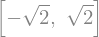

In [31]:
eq = sp.Eq(x**2 - 2, 0)
sp.solve(eq, x)


### Displaying Math Nicely with LaTeX

SymPy supports pretty-printing with LaTeX in Jupyter.


In [32]:
sp.Eq(sp.sin(x)**2 + sp.cos(x)**2, 1)


In [33]:
sp.latex(sp.Eq(sp.sin(x)**2 + sp.cos(x)**2, 1))


'\\sin^{2}{\\left(x \\right)} + \\cos^{2}{\\left(x \\right)} = 1'

## Practice makes perfect! 

- familiarize yourself with more than one language, but especially Python if you want to work on ML
- familiarize with statistical techniques (especially if interested in ML/data science)
- familiarize with data visualization techniques 


- get comfortable with presenting your work (see also the 3/1 lecture for Overleaf/Latex intro; 
   https://www.overleaf.com/read/kbgmssxspcvw will be active forever)
- think of ways/projects that show you are 
    - good with collaborations
    - good with learning new things


- work on some projects ( research/ internships and join competitions) 
- create a portofolio of projects  





# Neural Networks: For Beginners, By Beginners
adpated from Emil Krumov


## Introduction

So, neural nets. It’s the first thing that pops up in the minds of most of the common coders when they hear the buzzwords artificial intelligence and/or machine learning. Although not being the most fundamental material in the book, it is actually a not so bad starting point if explained in a beginner-friendly language.

Throughout this article I will take you on a journey starting from the very beginning of the neural networks ideology, take you through the core modern principles that make it learn, and finally show you a step-by-step implementation of a neural network model from scratch featuring Fully Connected, Activation, Flatten, Convolution and Pooling layers. This implementation is heavily based on and inspired by this amazing article by
Omar Aflak
which is a must-read for everyone who wants to learn more on the mathematical background of neural networks.

## Understanding Neural Networks

The history of neural networks traces back to 1943 when neurophysiologist Warren McCulloch and mathematician Walter Pitts portrayed a model of a human brain neuron with a simple electronic circuit which took a set of inputs, multiplied them by weighted values and put them through a threshold gate which gave as output a value of 0 or 1, based on the threshold value. This model was called the McCulloch-Pitts perceptron.

<img src="perceptron.gif" width=350 height=350 />
Image source: wikimedia commons


This idea was taken further by a psychologist called Rosenblatt who created the mathematical model of the perceptron and called it Mark I Perceptron. It was based on the McCulloch-Pitts model and was one of the first attempts to make a machine learn. The perceptron model also took a set of binary inputs which were then multiplied by weighted values(representing the synapse strength). Then a bias typically having a value of 1 was added(an offset that ensures that more functions are computable with the same input) and once again the output was set to 0 or 1 based on a threshold value. The input mentioned above is either the input data or other perceptrons’ outputs.

While the McCulloch-Pitts model was a groundbreaking research at that time, it lacked a good mechanism of learning which made it unsuitable for the area of AI.

Rosenblatt took inspiration from Donald Hebb’s thesis that learning occurred in the human brain through formation and change of synapses between neurons and then came up with the idea to replicate it in its own way. He thought of a perceptron which takes a training set of input-output examples and forms(learns) a function by changing the weights of the perceptron.

### The implementation took four steps:

1.  Initialize a perceptron with random weights
2.  For each example in the training set, compute the output
3.  If the output should have been 1 but was 0 instead, increase the weights with input 1 and vice-versa — if the output is 1 but should’ve been 0, decrease the weights with input of 1.
4.  Repeat steps 2–4 for each example until the perceptron outputs correct values

This set of instructions are what modern perceptrons are based on. Due to significant increase of computing power however, we can now work with many more perceptrons grouped together forming a neural network.

<img src="schem_of_perceptron_classifier.webp" width=350 height=350 />
Image source: mixtend

However, they are not just randomly put in the network but are actually part of another building block — a layer.

## Layers

A layer is made of perceptrons which are linked to the perceptrons of the previous and the next layers if such do happen to exist. Every layer defines it’s own functionality and therefore serves its own purpose. Neural networks consist of an input layer(takes the initial data), an output layer(returns the overall result of the network), and hidden layers(one or many layers with different sizes(number of perceptrons) and functionality).

<img src="layers.webp" width=350 height=350 />
Source: cs231n.github.io

In order for the network to be able to learn and produce results each layer has to implement two functions — forward propagation and backward propagation(shortly backpropagation).

In [3]:
# Base Class

class Layer:
  
  def __init__(self):
    self.input = None
    self.output = None
    
  def forward_propagation(self, input):
    raise NotImplementedError
    
  def backward_propagation(self, output_error, learning_rate):
    raise NotImplementedError



Imagine a train travelling between point A(input) and point B(output) which changes direction each time it reaches one of the points. The A to B course takes one or more samples from the input layer and carries it through the forward propagation functions of all hidden layers consecutively, until point B is reached(and a result is produced). Backpropagation is basically the same thing only in the opposite direction — the course takes the data through the backpropagation methods of all layers in a reverse order until it reaches point A. What differs the two courses though is what happens inside of these methods.

Forward propagation is only responsible for running the input through a function and return the result. No learning, only calculations. Backpropagation is a bit trickier because it is responsible for doing two things:

* Update the parameters of the layer in order to improve the accuracy of the forward propagation method.
* Implement the derivative of the forward propagation function and return the result.

So how and why does that happen exactly. The mystery unravels at point B — before the train changes direction and goes through the backpropagation of all the layers. In order to tune our model we need to answer two questions:

* How good the model’s result is compared with the actual output?
* How do we minimize this difference?

The process of answering the first question is known as calculating the error. To do that we use cost functions(synonyms with loss functions).

## $ MSE = \frac{1}{n} \sum_{i=0}^{N} (y_{Ei} - y_{Pi})^2$
Mean Squared Error(MSE) between expected (E) and predicted (P) values also called the sum of squared residuals. 
(This is the reduced $\chi^2$ statistic with the individual errors, $\sigma_i$ set to one)

It is a pretty straightforward function — we sum the squares of the difference between the actual output and the model’s output and we calculate the mean. But to help our model implementing MSE only isn’t going to be of any significant help. We must implement its derivative as well.

In [4]:
def mse(y, y_pred):    
  return np.mean((y - y_pred)**2)

def mse_prime(y, y_pred):
  return 2 * (y_pred - y) / y.size

But why do we need this? Because of the infamous…
## Gradient Descent

The last thing we need to do here is to show our model how to minimize the error. To do that we need an optimization algorithm(optimizer). Once again, there are many kinds of optimizers all serving the same purpose but for the sake of keeping things simple but still meaningful we are going to use the most widely used and the one which many other optimization algorithms are based on. Behold the mighty Gradient Descent:

<img src="Cost_v_weight.webp" width=650 height=350 />
Graphical representation of Gradient Descent | Source: Medium

Doesn’t look as scary as it sounds, does it? Good news everybody, it is a relatively simple concept. By definition, the gradient is a fancy word for derivative, or the rate of change of a function.

<img src="3Dgradient_descent.webp" width=650 height=350 />
3D representation of Gradient | Source: OReilly

So let’s imagine our model is a ball. The surface represents the gradient(derivative) of the error. We want the ball to roll down the surface(descent) as low as possible in order to decrease the altitude(the error). Taking it to Math level — we need to reach a global(or at least a good enough local) minimum.

In order to make the ball move though, we need to update our parameters at a certain rate — called learning rate. This is a predefined parameter that we pass to our model before we run it. Those kind of parameters are called <em>hyperparameters</em> and have a huge role in our model’s performance. Here is what I mean:

<img src="learning_rate.webp" width=650 height=350 />
Significance of Learning Rate | Source: analyticsvidhya.com

If we choose a learning rate that is too big the parameters will change drastically and we might skip the minimum. If our learning rate is too small on the other hand, it will take too much time and hence computing power to reach a satisfying result. That’s why tuning this parameter by testing the model with different values of the learning rate is rather important. It is highly recommended to start with a learning rate of 0.1 or 0.01 and start tuning from there on.

## Back to back(propagation)

Now we need to update the model’s parameters layer by layer by passing the appropriate data to the backpropagation methods. The backpropagation takes two parameters — output error and the learning rate. Output error is calculated either as the result of the derivative of the cost function or as the result of the backpropagation of the previous layer(if looked from point B to point A) — as written above, the backward propagation should give as a result the derivative of the forward propagation function. By doing this each layer shows its predecessor its error.

So in other words if for some reason we had a Sine Layer it would look something like this:

In [5]:
class SineLayer(Layer):
  
  def forward_propagation(self, input_data):
    return np.sin(input_data)
    
  def backward_propagation(self, output_error, learning_rate):
  
    # some update logic based on the output_error and learning_rate
    
    return np.cos(output_error)

Now that we’ve got the two parameters needed, the backpropagation should update the layers weights(if such are present). Since every type of layer is different, it defines its own logic for parameter tuning — something which we will cover in a bit.

## Wrapping up Gradient Descent

When each layer’s backpropagation is complete and our train arrives at point A, it takes the next sample(or set of samples) and starts its course through the hidden layers’ forward propagation functions once again — only this time, they should perform a bit better. This process continues on and on until training is completed and/or an error minimum has been reached.

Now that we’ve explained all the theory behind gradient descent, here is how it should look in code:

In [6]:
#This is just an example it will break without inputs!

for j in range(samples_length):
  output = x_train[j]
  
  for layer in layers:
    output = layer.forward_propagation(output)

  error = loss_prime(y_train[j], output)
  
  for layer in reversed(layers):
      error = layer.backward_propagation(error, learning_rate)

NameError: name 'samples_length' is not defined

I hope this snippet gives much more clearance on the algorithm itself. The only thing that we haven’t fully covered yet is what types of layers we can use in a network and how to implement them.

## Basic Layers

As though there are many kinds of layers to choose from for a starter, the infamous Fully-Connected Layer is undoubtedly the best choice.
### Fully-Connected

The Fully-Connected Layer is the most widely used class type. Its principles of work are based on the Rosenblatt model and are as follow:

1. Every single perceptron from the previous layer is linked to every single perceptron of this layer.
2. Each link has a weighted value(weight).
3. A bias (offset) is added to the results.
4. The layer’s weights are held in a 2D array with size m x n (where m is the number of perceptrons in the previous layer and n is the number of perceptrons in this layer). They are initialized as random values.
5. The layer’s bias is held in a 1D array with size n. It is initialized as random values.

<img src="fully_connected_layer.webp" width=350 height=350 />
Visual representation of Fully-Connected (FC) Layer | Source: cs231n.github.io

Now let’s head to our implementation:

In [7]:
class FCLayer(Layer):
  
  def __init__(self, output_size):    
    self.output_size = output_size
    self.bias = np.random.rand(1, self.output_size) - 0.5
    
    self.weights = None
    
  def forward_propagation(self, input_data):
    if self.weights is None:
      self.initialize(input_data)
    
    self.input = input_data.reshape((1, -1)) # ensure data is a 1D array
    self.output = np.dot(self.input, self.weights) + self.bias # Multiply the links by their weights
    
    return self.output
  
  def backward_propagation(self, output_error, learning_rate):
    input_error = np.dot(output_error, self.weights.T) # calculate derivative of the forward propagation
    weights_error = np.dot(self.input.T, output_error) # calculate the weights error
    
    self.weights -= learning_rate * weights_error # update the weights
    self.bias -= learning_rate * output_error # update the error
    
    return input_error
  
  def initialize(self, input_data):        
    self.weights = np.random.rand(input_data.size, self.output_size) - 0.5

As you can see the implementation of our to methods here is not something too complicated as long as you know basic linear algebra. And although relatively simple, this is a completely useful and optimized layer implementation which we will easily put to use later.

The only problem with Fully-Connected Layers though is that they are <strong>linear</strong>. In fact, most layers have completely linear logic. A linear function is a polynomial of one degree. Using only such functions hinders the model’s ability to learn complex functional mappings, hence, learning is limited. That’s why(by convention) it is good to add non-linear functionality after every linear layer using activation layers.

## Activation Layer

Activation layers are just like any other type of layer except they don’t have weights but use a non-linear function over the input instead.

In [8]:
class ActivationLayer(Layer):
  
  def __init__(self, activation, activation_prime):
    self.activation = activation
    self.activation_prime = activation_prime
    
  def forward_propagation(self, input_data):
    self.input = input_data
    self.output = self.activation(self.input)
    
    return self.output
  
  def backward_propagation(self, output_error, learning_rate):
    return self.activation_prime(self.input, self.output) * output_error

A good example of such activation function is tanh which stands for hyperbolic tangent.
<img src = "tanh.webp" width = 350 height = 350 />
tanh compared to sinh and cosh | Source: Wikipedia

Since we are going to need it when we begin building our model, we need to implement it:

In [9]:
def tanh(X): # used for forward propagation
  return np.tanh(X)

def tanh_prime(X, output): # used for backpropagation
  return 1 - np.tanh(X) ** 2 # derivative of tanh

Now that we have our two most important layers implemented, let’s proceed to implementing the whole Neural Network class.

## Neural Network Implementation

There are several methods that need to be implemented

* a <strong>constructor</strong> — here we need to pass the <em>hyperparameters</em> (learning rate and number of epochs — the number of times our network will run over the input dataset); initialization of necessary fields
* <strong> add layer method</strong> — pass an instance of a layer; used for model construction; can (should) be used several times in order to add several layers;
* <strong> use <em>cost function</em> method</strong> — specify the cost function to be used when training the model
* <strong>fit method</strong> — a standard name for the method that performs the training process; here is where we will place the gradient descent snippet from earlier
* <strong> predict method</strong> — a standard name for the method that is used to calculate results only; it is useful once the training process is complete

And here goes the code:

In [10]:
class NeuralNetwork:
  def __init__(self):
    self.layers = []
    self.loss = None
    self.loss_prime = None

  def add(self, layer):
    self.layers.append(layer)
    return self

  def use(self, loss, loss_prime):
    self.loss = loss
    self.loss_prime = loss_prime

    return self

  def fit(self, x_train, y_train, epochs, learning_rate):
    samples = len(x_train)

    for i in range(epochs): # each epoch represents one iteration over all samples
      err = 0

      for j in range(samples): # our gradient descent logic from earlier in the article
        output = x_train[j]
        for layer in self.layers:
          output = layer.forward_propagation(output)

        err += self.loss(y_train[j], output)

        error = self.loss_prime(y_train[j], output)
        for layer in reversed(self.layers):
            error = layer.backward_propagation(error, learning_rate)

      err /= samples
      print('epoch %d/%d   error=%f' % (i+1, epochs, err))

    return self

  def predict(self, input_data):
      samples = len(input_data)
      result = []

      for i in range(samples): # basically running the forward propagation of all layers to get the result
          output = input_data[i]
          for layer in self.layers:
              output = layer.forward_propagation(output)
          result.append(output)

      return result

You may have noticed the return self statement being present at the end of every method. The reason I put this is that it allows us to do method chaining. If you are not sure what I am talking about, you are going to see a good example in a bit.

Now let’s put it to work. We are going to use the <strong>MNIST</strong> database for classifying handwritten digits. You can download it from http://yann.lecun.com/exdb/mnist/, or you can easily import it from <strong>Keras</strong>.

In [49]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Since the pixel values are represented in the range [0; 255], we are going to scale that down to a range of [0.0, 1.0] or binary.

Another thing we did is we made the y(the results) be a little bit more convenient(note keras.utils.to_categorical). What it does is it represents the numeric result in a one-shot vector:

5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

This is helpful because our network’s output layer is going to consist of 10 nodes, each holding an output value. Since the ideal case output would be a correct one-hot vector it is now easier for the cost function to do its job.

Now let’s construct our first network by putting some FC and activation layers:


In [50]:
import keras

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 10)

In [51]:
fc_net = NeuralNetwork()

(fc_net
  .add(FCLayer(100))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(50))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(10))
  .add(ActivationLayer(tanh, tanh_prime))
  .use(mse, mse_prime)
  .fit(x_train[0:1000], y_train[0:1000], epochs=30, learning_rate=0.1)
)

preds = fc_net.predict(x_test[:1000])


epoch 1/30   error=0.218492
epoch 2/30   error=0.102655
epoch 3/30   error=0.081860
epoch 4/30   error=0.066438
epoch 5/30   error=0.055861
epoch 6/30   error=0.047691
epoch 7/30   error=0.041114
epoch 8/30   error=0.035953
epoch 9/30   error=0.031580
epoch 10/30   error=0.028111
epoch 11/30   error=0.025438
epoch 12/30   error=0.023313
epoch 13/30   error=0.021409
epoch 14/30   error=0.019886
epoch 15/30   error=0.018436
epoch 16/30   error=0.017228
epoch 17/30   error=0.016195
epoch 18/30   error=0.015312
epoch 19/30   error=0.014467
epoch 20/30   error=0.013648
epoch 21/30   error=0.012979
epoch 22/30   error=0.012422
epoch 23/30   error=0.011853
epoch 24/30   error=0.011294
epoch 25/30   error=0.010757
epoch 26/30   error=0.010316
epoch 27/30   error=0.009835
epoch 28/30   error=0.009462
epoch 29/30   error=0.009068
epoch 30/30   error=0.008742


The reason why we use only the first 1000 samples is that it is going to run too long if we use all the samples. Using more samples in this case will give you better results, so you can try a bigger range if you have the time.

Before we run this though, we need to add one more final touch — another pre-output activation function — Softmax. What it does is it normalizes an array with n elements in a probability distribution array consisting of n probabilities proportional to the exponentials of the input numbers, or simply put — calculates the probability that the sample matches a certain class.

### softmax function: $\mathrm{s}(z_i) = \frac{e^{z_i}}{\sum e^{z_j}}$

And the implementation:

In [13]:
def softmax(X):
  exps = np.exp(X - X.max())
  return exps / np.sum(exps)

def softmax_prime(X, output):
  result = np.zeros(X.shape)

  for i in range(len(output)):
    for j in range(len(X)):
      if i == j:
        result = output[i] * (1 - X[i])
      else: 
        result = -output[i] * X[j]
    
  return result

where we used:

## $\frac {\partial s_i}{\partial z_j} = s_i \frac {\partial}{\partial z_j} \mathrm{log} s_i = s_i \cdot (\delta_{ij} - s_j) $ 

for the derivative. The derivation is here: https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1

Let’s try it once again, only this time we are going to have the <strong>Softmax</strong> activation as our final layer.

In [29]:
fc_net = NeuralNetwork()

(fc_net
  .add(FCLayer(100))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(50))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(10))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(ActivationLayer(softmax, softmax_prime))
  .use(mse, mse_prime)
  .fit(x_train[0:1000], y_train[0:1000], epochs=30, learning_rate=.1)
)

preds = fc_net.predict(x_test[:100])

epoch 1/50   error=0.091195
epoch 2/50   error=0.090801
epoch 3/50   error=0.090768
epoch 4/50   error=0.090741
epoch 5/50   error=0.090469
epoch 6/50   error=0.090008
epoch 7/50   error=0.089953
epoch 8/50   error=0.089931
epoch 9/50   error=0.089916
epoch 10/50   error=0.089906
epoch 11/50   error=0.089898
epoch 12/50   error=0.089892
epoch 13/50   error=0.089886
epoch 14/50   error=0.089882
epoch 15/50   error=0.089878
epoch 16/50   error=0.089874
epoch 17/50   error=0.089871
epoch 18/50   error=0.089867
epoch 19/50   error=0.089865
epoch 20/50   error=0.089862
epoch 21/50   error=0.089859
epoch 22/50   error=0.089857
epoch 23/50   error=0.089854
epoch 24/50   error=0.089852
epoch 25/50   error=0.089850
epoch 26/50   error=0.089847
epoch 27/50   error=0.089845
epoch 28/50   error=0.089843
epoch 29/50   error=0.089841
epoch 30/50   error=0.089839
epoch 31/50   error=0.089837
epoch 32/50   error=0.089835
epoch 33/50   error=0.089833
epoch 34/50   error=0.089830
epoch 35/50   error=0.0

Now that we’ve trained our data, let’s evaluate our final model.

## Evaluation

Keep in mind that we have implemented a small model for educational purposes. It is not going to produce a quite high result. I would highly recommend playing around with it in order to get a better accuracy.

In order to evaluate our results, we are going to use a simple utility from <strong>sklearn</strong> which shows as the accuracy of our model.

In [30]:
from sklearn.metrics import accuracy_score

normal_results = [np.argmax(sample) for sample in preds]

print('Accuracy | Normal net: {}'.format(accuracy_score(y_test[:100], normal_results)))

Accuracy | Normal net: 0.15


Now that you know the basic of neural network construction we can proceed to the more advanced stuff…


## Convolutional Neural Networks(CNN)

The main problem with using FC layers for image recognition tasks is that it uses each pixel as a separate feature, which doesn’t seem quite right, given the fact that neural networks are aiming at replicating the human brain. And what helps our brain identify visual input is not just random points, but patterns of points instead. Here’s where processes called convolution and correlation come in handy.
### Convolution and Correlation

Convolution and correlation in image processing are almost identical processes having one small difference in their implementation. Both of them take an image I, produce a matrix O based on another matrix (called filter or feature map) F. Here is what I mean

Let’s start with correlation:
<img src = "correlate_matrix.webp" width = 650 height = 350 />
Visual representation of Correlation | Source: My Late Night PowerPoint Creations
<img src = "correlate_matrix2.webp" width = 650 height = 350 />

Let’s explain what is happening. The filter is acting like a sliding window which goes through the array, step by step, sliding right until it reaches the end of the row. Then it slides down and starts at the beginning of the row. At each position we sum the dot product of the filter F and the respective window of the input image I. Each position represents a cell in the output O.

### Now what about convolution?

The only difference between correlation and convolution is that convolution works with the same filter F, only rotated 180 degrees.

<img src = "convolution.webp" width = 650 height = 350 />

### But how does that helps us?

By using this sort of filters, going through our image we extract not only one pixel, but a whole sector of pixels, enabling our model to map more complex image features like lines and shapes.

For example, if you give a convolution layer a cat image it will be able to recognize small features like nose and ears. Then by adding more convolution layers after that it may recognize features of a larger scale like a head or a tail.

The way this works is having several filters per convolution layer, all initialized with random numbers. The goal behind this is to have each filter activate on different features(one features trains to detect the nose, other the eyes, etc.).

Usually when dealing with multi-channel images(like RGB) your filters will be 3-dimensional and will have the depth equal to the image channels count. That way you only focus on the 2D process.

#### Padding and Stride

The problem with convolution and correlation is that the corner pixels don’t get much attention — they only get processed once. If you want to change that, you can add a padding.

<img src = "padding.webp" width = 350 height = 350 />

Now even the corners will be processed as much as the other parts of the image.

Sometimes, however we don’t want to pay as much attention to each pixel(highly applicable when dealing with larger images). Having each filter go through every possible position is sometimes an overkill. That’s why we can configure a stride.

The stride tells our filter how much it should slide when going to its next position. Having a stride of 2 will skip one position with each shift which reduces the size of the output and makes computation lighter.

<img src = "stride.webp" width = 650 height = 350 />

<em>Having no stride basically means having a stride of 1 — the filters cover every possible position without skipping</em>.

## Implementation

First let’s list our parameters:

* Filters Count — how many filters are we going to have in the layer
* Filter Size — how big our filters will be
* Padding — how much zero padding are we going to have(we are going to use a tuple format for this one (x, y), where x stands for column zero padding and y stands for row zero padding).
* Stride — just a plain number showing how many positions should a filter move per slide

NB! Because we are going to initialize our filters with random values, there is practically no difference between using correlation or convolution so we are going to use correlation for simplicity.

Here’s a very iterative(for-loopy) approach on implementing a convolution layer:

In [31]:
class ConvolutionalLayerSlow(Layer):
  
  def __init__(self, filters_count, filter_shape, padding=(0, 0), stride=1):
    self.filters_count = filters_count
    self.filter_shape = filter_shape
    self.stride = stride
    self.padding = (padding[0], padding[1], 0)
        
    self.input_shape = None
    self.input_depth = None

    self.output_shape = None
    self.weights = None
   
  def forward_propagation(self, input_data):
    
    if self.input_shape is None:
      self.initialize(input_data)
    
    self.input = np.pad(input_data, ((self.padding[0], self.padding[0]), (self.padding[1], self.padding[1]), (self.padding[2], self.padding[2])), 'constant') 
    self.output = np.zeros(self.output_shape)

    for filter in range(self.filters_count):
       for channel in range(self.input_depth):
        row_iteration = 0

        for row in range(0, self.input_shape[0], self.stride):
          col_iteration = 0

          for col in range(0, self.input_shape[1], self.stride):        
            if row + self.filter_shape[0] >= self.input_shape[0] or col + self.filter_shape[1] >= self.input_shape[1]:
              continue

            self.output[row_iteration, col_iteration, filter] += np.sum(self.input[row : row + self.filter_shape[0], col + self.filter_shape[1], channel] * self.weights[filter])    

            col_iteration += 1

          row_iteration += 1

    return self.output
    
  def backward_propagation(self, output_error, learning_rate):
    in_error = np.zeros(self.input_shape)
    dWeights = np.zeros((self.filters_count, self.filter_shape[0], self.filter_shape[1]))

    for filter in range(self.filters_count):
      for channel in range(self.input_depth):
      
        row_iteration = 0

        for row in range(output_error.shape[0]):     
          input_row_index = row * self.stride

          for col in range(output_error.shape[1]):        
            input_col_index = col * self.stride  

            if input_row_index + self.filter_shape[0] >= self.input_shape[0] or input_col_index + self.filter_shape[1] >= self.input_shape[1]:
              continue

            in_error[input_row_index : input_row_index + self.filter_shape[0], input_col_index : input_col_index + self.filter_shape[1], channel] += self.weights[filter] * output_error[row, col, filter]
            dWeights[filter] = self.input[row_iteration : row_iteration + self.filter_shape[0], input_col_index : input_col_index + self.filter_shape[1], channel] * output_error[row, col, filter]

    self.weights -= learning_rate * dWeights
    
    return in_error
  
  def initialize(self, input_data):    
      self.input_shape = input_data.shape
      self.input_depth = self.input_shape[2]
    
      self.output_shape = (int((self.input_shape[0] - self.filter_shape[0] + 2 * self.padding[0]) / self.stride + 1), int((self.input_shape[1] - self.filter_shape[1] + 2 * self.padding[1]) / self.stride + 1), self.filters_count) # using a simple formula to calculate output size based on input size, padding and stride
      self.weights = np.random.rand(self.filters_count, self.filter_shape[0], self.filter_shape[1]) - 0.5

Though being a bit easier to understand, it is too slow because it lacks vectorization (uses for-loops instead of array-based operations). That’s why I dug around and found some very useful library methods that helped me optimize my layer:

* <strong>skimage.util.view_as_windows</strong> — I used it to automatically get the positions where my filters should go instead of looping through them on my own.
* <strong>np.tensordot</strong> — I used it to multiply the windows(which I got from the method mentioned above) with the filters.

Unfortunately, I could not find an easy way to vectorize the calculation of in_error (the closest I got was using scipy.signal.convolve_2d, but it did not work with stride), until it occurred to me that vectorized operations are usually for loops written in a lower level language so I implemented my own method called convolve_2d_stride using Cython (a library which lets you easily integrate C code into Python).

In [39]:
%load_ext cython
%%cython

cimport numpy as np

cpdef np.ndarray convolve_2d_stride(np.ndarray data, np.ndarray filter, np.ndarray result, int stride):
  
  cdef int output_rows_count = data.shape[0]
  cdef int output_cols_count = data.shape[1]
  
  cdef int filter_rows_count = data.shape[0]
  cdef int filter_cols_count = data.shape[1]
  
  cdef int result_rows_count = data.shape[0]
  cdef int result_cols_count = data.shape[1]

  cdef int row = 0
  cdef int col = 0
  
  cdef int input_row_index = 0
  cdef int input_col_index = 0
    
  for row in range(output_rows_count):     
    input_row_index = row * stride

    for col in range(output_cols_count):        
      input_col_index = col * stride  

      if input_row_index + filter_rows_count >= result_rows_count or input_col_index + filter_cols_count >= result_cols_count:
        continue

      result[input_row_index : input_row_index + result_rows_count, input_col_index : input_col_index + filter_cols_count] += filter * data[row, col]
      
  return result  

SyntaxError: invalid syntax (4026956673.py, line 4)

For more info on Cython please visit their documentation (https://cython.readthedocs.io/en/latest/).

Now that we have all our puzzle pieces on our table, let’s assemble our optimized convolution layer:

In [40]:
class ConvolutionalLayer(Layer):
  
  def __init__(self, filters_count, filter_shape, padding=(0, 0), stride=1):
    self.filters_count = filters_count
    self.filter_shape = filter_shape
    self.stride = stride
    self.padding = (padding[0], padding[1], 0)
        
    self.input_shape = None
    self.input_depth = None

    self.output_shape = None
    self.weights = None
    
  def forward_propagation(self, input_data):
    
    if self.input_shape is None:
      self.initialize(input_data)
    
    self.input = np.pad(input_data, ((self.padding[0], self.padding[0]), (self.padding[1], self.padding[1]), (self.padding[2], self.padding[2])), 'constant') 
    self.output = np.zeros(self.output_shape)

    for channel in range(self.input_depth):
      windows = skimage.util.view_as_windows(self.input[:, :, channel], self.filter_shape, self.stride)
      
      for filter in range(self.filters_count):
        self.output[:, :, filter] += np.tensordot(windows, self.weights[filter], axes=((2,3),(0,1)))

    return self.output
    
  def backward_propagation(self, output_error, learning_rate):
    in_error = np.zeros(self.input_shape)
    dWeights = np.zeros((self.filters_count, self.filter_shape[0], self.filter_shape[1]))

    for channel in range(self.input_depth):
      
      windows = skimage.util.view_as_windows(self.input[:, :, channel], self.filter_shape, self.stride)
      
      for filter in range(self.filters_count):
        in_error[:, :, channel] += convolve_2d_stride(output_error, self.weights[filter], in_error[:, :, channel], self.stride) # here we use the cython function from earlier
        dWeights  = np.tensordot(windows, output_error[:, :, filter], axes=((0,1),(0,1)))
  
    self.weights -= learning_rate * dWeights
    
    return in_error
  
  def initialize(self, input_data):    
      self.input_shape = input_data.shape
      self.input_depth = self.input_shape[2]
    
      self.output_shape = (int((self.input_shape[0] - self.filter_shape[0] + 2 * self.padding[0]) / self.stride + 1), int((self.input_shape[1] - self.filter_shape[1] + 2 * self.padding[1]) / self.stride + 1), self.filters_count)        
      self.weights = np.random.rand(self.filters_count, self.filter_shape[0], self.filter_shape[1]) - 0.5

Speaking of optimization, the next set of layers that we will look at will help us save our GPUs from melting.
Pooling Layers

The idea behind pooling layers is to reduce the spatial size of the output of previous convolution layers. This helps our model for two reasons:

1. It lowers down the computational power needed.
2. It creates a lower resolution version of the input. This process is also called down-sampling. The reason this helps is Convolution layers’s filters are often bound to an exact position in the image. Having a small movement or distortion may result in a different output which is not desirable. Down-sampled images still contain the larger structural features, only excluding fine details that may hinder the model’s performance.

An alternative to down-sampling that one can use to solve this problem is use a larger stride in the Convolution layer on the first place.

The usual pattern met in most CNN models is as follows:

* Convolution Layer
* Activation Layer
* Pooling Layer

<img src="CNN_layers.webp" width = 650 height = 350 />

A typical CNN pattern | Source: jefkine.com

### Principle of work

The way pooling works is somewhat similar to convolution and correlation. Once again we have a window(called pool) which slides over our input. The pool however does not contain any data like the filter/feature map did. When a pool moves in a position it calculates a result based only on the values in this position(like average or max).

To help you understand how it works we are going to implement the most widely-used type — Max Pooling Layer.
### Max Pooling Layer

The idea is simple — when the pool slides to a position, the maximum value in that position is stored in the output.

<img src = "max_pooling_layer.webp" width = 650 height = 350 />
Visual representation of Max Pooling | Source: My Late Night PowerPoint Creations

### Parameters

The list here is a lot simpler than the one for Convolution layer

* Pool Shape— the shape of the pool, described in a tuple, a good default is (2, 2)
* Stride — same as in convolution, a good default is 2(most of the cases it is good to match the dimensions of the pool)

### Implementation

It is a good idea to implement a base class once again, since some operation are the same for all pooling layers(like initialization for instance):

In [41]:
class PoolingLayer(Layer):
  
  def __init__(self, pool_shape=(2,2), stride=2):
    self.pool_shape = pool_shape
    self.stride = stride
    self.padding = (int((self.pool_shape[0] - self.stride) / 2), int((self.pool_shape[1] - self.stride) / 2), 0)
        
    self.input_shape = None
    self.input_depth = None
    
    self.output_shape = None
    self.weights = None
    
  def forward_propagation(self, input):
    raise NotImplementedError
    
  def backward_propagation(self, output_error, learning_rate):
    raise NotImplementedError
    
  def initialize(self, input_data):    
    
    self.input_shape = input_data.shape
    self.input_depth = self.input_shape[2]
    
    self.output_shape = (int((self.input_shape[0] - self.pool_shape[0] + 2 * self.padding[0]) / self.stride + 1), int((self.input_shape[1] - self.pool_shape[1] + 2 * self.padding[1]) / self.stride + 1), self.input_depth)            
    self.weights = np.random.rand(self.pool_shape[0], self.pool_shape[1], self.input_depth) - 0.5

And here goes the <strong>Max Pooling</strong>:

In [42]:
class MaxPoolingLayer(PoolingLayer):  
  
  def forward_propagation(self, input_data):
    
    if self.input_shape is None:
      self.initialize(input_data)
    
    self.input = np.pad(input_data, ((self.padding[0], self.padding[0]), (self.padding[1], self.padding[1]), (self.padding[2], self.padding[2])), 'constant')
    self.output = np.zeros(self.output_shape)

    for layer in range(self.input_depth):
        row_iteration = 0

        for row in range(0, self.input_shape[0], self.stride):
          col_iteration = 0

          for col in range(0, self.input_shape[1], self.stride):        
            if row + self.pool_shape[0] >= self.input_shape[0] or col + self.pool_shape[1] >= self.input_shape[1]:
              continue

            self.output[row_iteration, col_iteration, layer] = np.amax(self.input[row : row + self.pool_shape[0], col : col + self.pool_shape[1], layer])

            col_iteration += 1

          row_iteration += 1

    return self.output
    
  def backward_propagation(self, output_error, learning_rate):
    in_error = np.zeros(self.input.shape)
    
    for layer in range(self.input_depth):

      row_iteration = 0

      for row in range(output_error.shape[0]):     
        input_row_index = row * self.stride

        for col in range(output_error.shape[1]):        
          input_col_index = col * self.stride  

          if input_row_index + self.pool_shape[0] >= self.input_shape[0] or input_col_index + self.pool_shape[1] >= self.input_shape[1]:
            continue
            
          pool = self.input[input_row_index : input_row_index + self.pool_shape[0], input_col_index : input_col_index + self.pool_shape[1], layer]
          mask = (pool == np.max(pool))
          in_error[input_row_index : input_row_index + self.pool_shape[0], input_col_index : input_col_index + self.pool_shape[1], layer] = mask * output_error[row, col, layer]
    
    return in_error

I strongly encourage you to try and implement <strong>Average Pooling Layer</strong> by yourself.

Before we build our first CNN model, we need to reformat our data so that it can be used by other layers like Fully-Connected. This is needed because the last non-activation layer should always be Fully-Connected when we are solving a classification task. And because Fully-Connected would be a mess if its input is anything else then a 1D array, we must flatten(convert N-D array to 1D array) the data first.
### Flatten Layer

This is probably the simplest layer to implement. Our forward propagation needs to flatten the input and the backpropagation needs to reformat it back to its initial form:

In [43]:
class FlattenLayer(Layer):
  
  def forward_propagation(self, input_data):
    self.input_shape = input_data.shape
    return input_data.flatten()
  
  def backward_propagation(self, output_error, learning_rate):
    return output_error.reshape(self.input_shape)

Now let’s build our first CNN…
### CNN Model

We are going to build a simple CNN using all the layers we implemented in this article:

In [44]:
conv_net = NeuralNetwork()

(conv_net
  .add(ConvolutionalLayer(filter_shape=(3, 3), filters_count=5, stride=2, padding=(1,1)))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(MaxPoolingLayer(pool_shape=(2, 2)))
  .add(FlattenLayer())
  .add(FCLayer(100))
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(50))  
  .add(ActivationLayer(tanh, tanh_prime))
  .add(FCLayer(10))
  .add(FlattenLayer())
  .add(ActivationLayer(tanh, tanh_prime))
  .add(ActivationLayer(softmax, softmax_prime))
  .use(mse, mse_prime)
  .fit(x_train[0:4000], y_train[0:4000], epochs=30, learning_rate=0.1)
)

conv_preds = conv_net.predict(x_test[:100])

NameError: name 'skimage' is not defined

Now let’s see how well it performs:

In [ ]:
conv_results = [np.argmax(sample) for sample in conv_preds]

print('Accuracy | Conv Net: {}'.format(accuracy_score(y_test[:100], conv_results)))

It should perform better than our normal net, although it can actually achieve much higher results if you play around with it and have the patience to wait for the training process to finish. 

## In this demo, we will be training a neural network to 

###    1. draw a unit circle
It will take an angle theta as the input, and produce location (x, y) as output.
We will also explore what happens when you apply an NN to inputs that 
are outside of the training space.

and
###    2. calculate a Gaussian
given inputs 
    x     (position)
    mu    (mean)
    sigma (standard deviation)

We will train it on x     in [+- 3sigma from mu]
                    mu    in [30  , 50)
                    sigma in [ 0.1, 10)

Note: These are not problems that require a neural network!
      We are using these simple cases to illustrate how to train/use a NN.
"""

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt


# Ignore FutureWarnings and Depreciation Warnings
import warnings
warnings.simplefilter('ignore', category=Warning)
# Some will still make it through...Tensorflow is annoying

from sklearn import metrics


import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Convolution1D, Dense, Input
from keras.losses import mean_squared_error
from keras.optimizers  import Adam
import tensorflow as tf


2024-04-22 12:04:21.088040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def DenseNet(inp_shape, out_shape, learnrate=1e-3, 
             layers=None, activations=None, outactiv=None):
    """
    Builds a dense (fully-connected) neural network.

    Inputs
    ------
    inp_shape  : int.   Number of inputs.
    out_shape  : int.   Number of outputs.
    learnrate  : float. Model learning rate.
    layers     : 1D array/list. Number of neurons in each hidden layer.
    activations: 1D array/list. Activation function for each hidden layer.
    outactiv   : string. Activation function for output layer.
                         If None, linear activation.

    Outputs
    -------
    model: Keras model object.

    Examples
    --------
    >>> model = DenseNet(4, 1, learnrate=1e-3)
    >>> print(model.summary())
    Model: "model_1"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_1 (InputLayer)         (None, 4)                 0         
    _________________________________________________________________
    dense_1 (Dense)              (None, 1)                 5         
    =================================================================
    Total params: 5
    Trainable params: 5
    Non-trainable params: 0
    _________________________________________________________________

    >>> model = DenseNet(4, 1, learnrate=1e-3, layers=[4, 8], 
    ...                  activations=['tanh', 'relu'])
    >>> print(model.summary())
    Model: "model_2"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_2 (InputLayer)         (None, 4)                 0         
    _________________________________________________________________
    dense_2 (Dense)              (None, 4)                 20        
    _________________________________________________________________
    dense_3 (Dense)              (None, 8)                 40        
    _________________________________________________________________
    dense_4 (Dense)              (None, 1)                 9         
    =================================================================
    Total params: 69
    Trainable params: 69
    Non-trainable params: 0
    _________________________________________________________________


    Revisions
    ---------
    2019-11-14  Michael Himes           Initial implementation.
    """
    # Set the input layer
    inp = keras.Input(shape=(inp_shape,))
    x   = inp
    
    # Set the hidden layers
    if layers is not None:
        for i in range(len(layers)):
            x = Dense(layers[i], activation=activations[i])(x)
    
    # Set the output layer
    if outactiv is None:
        out = Dense(out_shape)(x)
    else:
        out = Dense(out_shape, activation=outactiv)(x)
    
    # Build the model
    model = Model(inp, out)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learnrate),
                  loss=mean_squared_error)
    
    return model

In [4]:
def TrainModel(model, 
               inputs_tr_norm,  outputs_tr_norm, 
               inputs_val_norm, outputs_val_norm, 
               batch_size, epochs, patience, 
               fname, load=True):
    """
    Trains a model and plots the loss history.

    Inputs
    ------
    model           : object. Keras model. See DenseNet().
    inputs_tr_norm  : array.  Normalized training inputs.
    outputs_tr_norm : array.  Normalized training outputs.
    inputs_val_norm : array.  Normalized validation inputs.
    outputs_val_norm: array.  Normalized validation outputs.
    batch_size      : int.    Mini-batch size per training iteration.
    epochs          : int.    Max number of epochs for training.
    patience        : int.    Number of epochs to stop training after 
                              if no improvement in loss
    fname           : string. A descriptor of the model, for plot savenames.
    load            : bool.   Sets whether to attempt to load a .h5 weight file.

    Outputs
    -------
    2 plots:
        `fname`_loss.png      : Full training/validation loss history.
        `fname`_loss_zoom.png : Zoomed in view of the end of the loss history.

    Examples
    --------
    # The following must be executed from the NN-gaussian/ directory.
    >>> np.random.seed(0)
    >>> xlo    , xhi     = 30  , 50
    >>> mulo   , muhi    = 39  , 41
    >>> sigmalo, sigmahi =  1  , 10
    >>> nsamp            = int(1e5)
    >>> inputs      = np.zeros((nsamp, 3))
    >>> inputs[:,0] = np.random.uniform(xlo    , xhi    , nsamp)
    >>> inputs[:,1] = np.random.uniform(mulo   , muhi   , nsamp)
    >>> inputs[:,2] = np.random.uniform(sigmalo, sigmahi, nsamp)
    >>> gaus = 1./inputs[:,2]/np.sqrt(2.*np.pi) * \
    ...        np.exp(-(1./2.) * ((inputs[:,0] - inputs[:,1])/inputs[:,2])**2)
    >>> gaus = np.expand_dims(gaus, -1)
    >>> ntr             = int(nsamp * 0.7)
    >>> nval            = int(nsamp * 0.1)
    >>> inputs_tr       = inputs[        :ntr         ]
    >>> inputs_val      = inputs[ntr     :ntr+nval    ]
    >>> gaus_tr         = gaus  [        :ntr         ]
    >>> gaus_val        = gaus  [ntr     :ntr+nval    ]
    >>> inputs_tr_mean  = np.mean(inputs_tr, axis=0)
    >>> inputs_tr_stdev = np.std (inputs_tr, axis=0)
    >>> gaus_tr_mean    = np.mean(gaus_tr, axis=0)
    >>> gaus_tr_stdev   = np.std (gaus_tr, axis=0)
    >>> inputs_tr_norm  = (inputs_tr  - inputs_tr_mean) / inputs_tr_stdev
    >>> inputs_val_norm = (inputs_val - inputs_tr_mean) / inputs_tr_stdev
    >>> gaus_tr_norm    = (gaus_tr  - gaus_tr_mean) / gaus_tr_stdev
    >>> gaus_val_norm   = (gaus_val - gaus_tr_mean) / gaus_tr_stdev
    >>> learnrate       = 1e-3
    >>> model           = DenseNet(inputs.shape[-1], gaus_tr.shape[-1], 
    ...                            learnrate=learnrate)
    >>> patience        = 30
    >>> batch_size      = 1024
    >>> epochs          = 800
    >>> TrainModel(model, 
    ...            inputs_tr_norm,  gaus_tr_norm, 
    ...            inputs_val_norm, gaus_val_norm, 
    ...            batch_size, epochs, patience, 
    ...            'example')

    # This will produce a lot of output, which is not shown here. 
    # The last of the output should be similar to:
    Epoch 61/800
    70000/70000 [==============================] - 0s 2us/step - loss: 0.9815 - val_loss: 0.9235
    
    Epoch 00061: val_loss did not improve from 0.92312
    Epoch 00061: early stopping
    # And 2 plots will be created, example_loss.png, and example_loss_zoom.png
    # in ./plots/

    Revisions
    ---------
    2019-11-14  Michael Himes           Initial implementation.
    2019-11-18  Michael Himes           Updated example.
    """
    ### First, callbacks! These will run during training and do something useful
    ### at the end of each epoch.
    ### For example, the EarlyStopping callback will monitor training and enforce 
    ### early stopping for us
    Early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               min_delta=0,
                                               patience=patience,
                                               verbose=1, mode='auto')
    ### The ModelCheckpoint callback saves the best-performing model
    weight_file      = 'weights/'+fname+'_checkpoint_weights_mse_loss.h5'
    # Load, if specified
    if load:
        try:
            model.load_weights(weight_file)
            print("Loaded previously-trained model.")
            return
        except:
            print("Weight file does not exist. Training new model.")

    Model_Checkpoint = keras.callbacks.ModelCheckpoint(weight_file, 
                                                       monitor='val_loss',
                                                       save_best_only=True,
                                                       save_weights_only=True,
                                                       mode='auto', verbose=1)
    history = model.fit(x=inputs_tr_norm, y=outputs_tr_norm, 
                        validation_data=(inputs_val_norm, outputs_val_norm), 
                        batch_size=batch_size, epochs=epochs, 
                        callbacks=[Early_Stop, Model_Checkpoint])
    # Plot the loss history
    tr_loss  = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(tr_loss , label='train')
    plt.plot(val_loss, label='val')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.savefig('plots/'+fname+'_loss.png')
    plt.ylim(np.amin(val_loss)*0.9, np.amin(val_loss)*1.5)
    plt.savefig('plots/'+fname+'_loss_zoom.png')
    plt.show()

In [5]:
def ValidateModel(model, 
                  inputs_val_norm, outputs_val_norm, 
                  outputs_mean, outputs_stdev, 
                  batch_size, fname):
    """
    Validates a model by computing the root mean squared error (RMSE) and R^2 
    for the validation set.

    Inputs
    ------
    model           : object. Keras model. See DenseNet().
    inputs_val_norm : array.  Normalized training inputs.
    outputs_val_norm: array.  Normalized training outputs.
    outputs_mean    : array.  Normalized validation inputs.
    outputs_stdev   : array.  Normalized validation outputs.
    batch_size      : int.    Mini-batch size per training iteration.
    fname           : string. A descriptor of the model, for plot savenames.

    Outputs
    -------
    val_pred: array. Predicted values for validation set.
    rmse_val: array. Normalized RMSE for each output parameter.
    r2_val  : array. R^2 value for each output parameter.
    `fname`_r2_val_param<param#>.png : Plot of predicted vs. true 
                                       for each parameter.
    

    Examples
    --------
    # The following must be executed from the NN-gaussian/ directory.
    >>> np.random.seed(0)
    >>> xlo    , xhi     = 30  , 50
    >>> mulo   , muhi    = 39  , 41
    >>> sigmalo, sigmahi =  1  , 10
    >>> nsamp            = int(1e5)
    >>> inputs      = np.zeros((nsamp, 3))
    >>> inputs[:,0] = np.random.uniform(xlo    , xhi    , nsamp)
    >>> inputs[:,1] = np.random.uniform(mulo   , muhi   , nsamp)
    >>> inputs[:,2] = np.random.uniform(sigmalo, sigmahi, nsamp)
    >>> gaus = 1./inputs[:,2]/np.sqrt(2.*np.pi) * \
    ...        np.exp(-(1./2.) * ((inputs[:,0] - inputs[:,1])/inputs[:,2])**2)
    >>> gaus = np.expand_dims(gaus, -1)
    >>> ntr             = int(nsamp * 0.7)
    >>> nval            = int(nsamp * 0.1)
    >>> inputs_tr       = inputs[        :ntr         ]
    >>> inputs_val      = inputs[ntr     :ntr+nval    ]
    >>> gaus_tr         = gaus  [        :ntr         ]
    >>> gaus_val        = gaus  [ntr     :ntr+nval    ]
    >>> inputs_tr_mean  = np.mean(inputs_tr, axis=0)
    >>> inputs_tr_stdev = np.std (inputs_tr, axis=0)
    >>> gaus_tr_mean    = np.mean(gaus_tr, axis=0)
    >>> gaus_tr_stdev   = np.std (gaus_tr, axis=0)
    >>> inputs_tr_norm  = (inputs_tr  - inputs_tr_mean) / inputs_tr_stdev
    >>> inputs_val_norm = (inputs_val - inputs_tr_mean) / inputs_tr_stdev
    >>> gaus_tr_norm    = (gaus_tr  - gaus_tr_mean) / gaus_tr_stdev
    >>> gaus_val_norm   = (gaus_val - gaus_tr_mean) / gaus_tr_stdev
    >>> learnrate       = 1e-3
    >>> model           = DenseNet(inputs.shape[-1], gaus_tr.shape[-1], 
    ...                            learnrate=learnrate)
    >>> patience        = 30
    >>> batch_size      = 1024
    >>> epochs          = 800
    >>> TrainModel(model, 
    ...            inputs_tr_norm,  gaus_tr_norm, 
    ...            inputs_val_norm, gaus_val_norm, 
    ...            batch_size, epochs, patience, 
    ...            'example')

    # This will produce a lot of output, which is not shown here. 
    # The last of the output should be similar to:
    Epoch 61/800
    70000/70000 [==============================] - 0s 2us/step - loss: 0.9815 - val_loss: 0.9235
    
    Epoch 00061: val_loss did not improve from 0.92312
    Epoch 00061: early stopping
    # And 2 plots will be created, example_loss.png, and example_loss_zoom.png
    # in ./plots/
    # Now, validate
    val_pred_denorm, rmse_val, r2_val = ValidateModel(model, 
                                                      inputs_val_norm, 
                                                      gaus_val_norm, 
                                                      gaus_tr_mean, 
                                                      gaus_tr_stdev, 
                                                      batch_size, 
                                                      'example')
    Normalized RMSE: [0.96093928]
    R2: [0.01351501]
    # And 1 plot is created, example_r2_val_param0.png in ./plots/

    Revisions
    ---------
    2019-11-14  Michael Himes           Initial implementation.
    2019-11-18  Michael Himes           Updated example.
    """
    # Array to hold predictions
    val_pred = np.zeros(outputs_val_norm.shape)
    # Make predictions
    for batch in range(0, int(np.ceil(outputs_val_norm.shape[0]/batch_size))):
        val_batch = inputs_val_norm[batch*batch_size : (batch+1)*batch_size]
        val_pred[ batch   *batch_size : \
                 (batch+1)*batch_size]    = model.predict(val_batch)

    # Calculate RMSE
    rmse_val = np.sqrt(np.mean((val_pred - outputs_val_norm)**2, axis=0))

    ### The closer to 0, the better
    print("Normalized RMSE:", rmse_val)

    # Denormalize validation predictions
    val_pred *= outputs_stdev
    val_pred += outputs_mean

    # Calculate R^2 for each parameter
    r2_val = np.zeros(outputs_val_norm.shape[-1])
    outputs_val_denorm = outputs_val_norm * outputs_stdev + outputs_mean
    for p in range(outputs_val_norm.shape[-1]):
        r2_val[p] = metrics.r2_score(outputs_val_denorm[:,p], val_pred[:,p])
        # Plot
        plt.scatter(outputs_val_denorm[:,p], val_pred[:,p], s=1)
        plt.plot([np.amin([outputs_val_denorm[:,p], val_pred[:,p]]), 
                  np.amax([outputs_val_denorm[:,p], val_pred[:,p]])], 
                 [np.amin([outputs_val_denorm[:,p], val_pred[:,p]]), 
                  np.amax([outputs_val_denorm[:,p], val_pred[:,p]])], 
                  c='r', lw=1)
        plt.xlim( np.amin([outputs_val_denorm[:,p], val_pred[:,p]]), 
                  np.amax([outputs_val_denorm[:,p], val_pred[:,p]]))
        plt.ylim( np.amin([outputs_val_denorm[:,p], val_pred[:,p]]), 
                  np.amax([outputs_val_denorm[:,p], val_pred[:,p]]))
        plt.xlabel("True")
        plt.ylabel("Predicted")
        plt.savefig(fname+"_r2_val_param"+str(p)+".png")
        plt.show()

    ### The closer to 1, the better
    print("R2:", r2_val)

    return val_pred, rmse_val, r2_val

In [6]:
def TestModel(model, 
              inputs_te_norm, outputs_te_norm, 
              outputs_mean, outputs_stdev, 
              batch_size, fname):
    """
    Tests a model by computing the root mean squared error (RMSE) and R^2 
    for the test set.

    Inputs
    ------
    model           : object. Keras model. See DenseNet().
    inputs_te_norm  : array.  Normalized training inputs.
    outputs_te_norm : array.  Normalized training outputs.
    outputs_mean    : array.  Normalized validation inputs.
    outputs_stdev   : array.  Normalized validation outputs.
    batch_size      : int.    Mini-batch size per training iteration.
    fname           : string. A descriptor of the model, for plot savenames.

    Outputs
    -------
    te_pred: array. Predicted values for test set.
    rmse_te: array. Normalized RMSE for each output parameter.
    r2_te  : array. R^2 value for each output parameter.
    `fname`_r2_test_param<param#>.png : Plot of predicted vs. true 
                                        for each parameter.
    
    Examples
    --------
    # The following must be executed from the NN-gaussian/ directory.
    >>> np.random.seed(0)
    >>> xlo    , xhi     = 30  , 50
    >>> mulo   , muhi    = 39  , 41
    >>> sigmalo, sigmahi =  1  , 10
    >>> nsamp            = int(1e5)
    >>> inputs      = np.zeros((nsamp, 3))
    >>> inputs[:,0] = np.random.uniform(xlo    , xhi    , nsamp)
    >>> inputs[:,1] = np.random.uniform(mulo   , muhi   , nsamp)
    >>> inputs[:,2] = np.random.uniform(sigmalo, sigmahi, nsamp)
    >>> gaus = 1./inputs[:,2]/np.sqrt(2.*np.pi) * \
    ...        np.exp(-(1./2.) * ((inputs[:,0] - inputs[:,1])/inputs[:,2])**2)
    >>> gaus = np.expand_dims(gaus, -1)
    >>> ntr             = int(nsamp * 0.7)
    >>> nval            = int(nsamp * 0.1)
    >>> nte             = int(nsamp * 0.2)
    >>> inputs_tr       = inputs[        :ntr         ]
    >>> inputs_val      = inputs[ntr     :ntr+nval    ]
    >>> inputs_te       = inputs[ntr+nval:ntr+nval+nte]
    >>> gaus_tr         = gaus  [        :ntr         ]
    >>> gaus_val        = gaus  [ntr     :ntr+nval    ]
    >>> gaus_te         = gaus  [ntr+nval:ntr+nval+nte]
    >>> inputs_tr_mean  = np.mean(inputs_tr, axis=0)
    >>> inputs_tr_stdev = np.std (inputs_tr, axis=0)
    >>> gaus_tr_mean    = np.mean(gaus_tr, axis=0)
    >>> gaus_tr_stdev   = np.std (gaus_tr, axis=0)
    >>> inputs_tr_norm  = (inputs_tr  - inputs_tr_mean) / inputs_tr_stdev
    >>> inputs_val_norm = (inputs_val - inputs_tr_mean) / inputs_tr_stdev
    >>> inputs_te_norm  = (inputs_te  - inputs_tr_mean) / inputs_tr_stdev
    >>> gaus_tr_norm    = (gaus_tr  - gaus_tr_mean) / gaus_tr_stdev
    >>> gaus_val_norm   = (gaus_val - gaus_tr_mean) / gaus_tr_stdev
    >>> gaus_te_norm    = (gaus_te  - gaus_tr_mean) / gaus_tr_stdev
    >>> learnrate       = 1e-3
    >>> model           = DenseNet(inputs.shape[-1], gaus_tr.shape[-1], 
    ...                            learnrate=learnrate)
    >>> patience        = 30
    >>> batch_size      = 1024
    >>> epochs          = 800
    >>> TrainModel(model, 
    ...            inputs_tr_norm,  gaus_tr_norm, 
    ...            inputs_val_norm, gaus_val_norm, 
    ...            batch_size, epochs, patience, 
    ...            'example')

    # This will produce a lot of output, which is not shown here. 
    # The last of the output should be similar to:
    Epoch 61/800
    70000/70000 [==============================] - 0s 2us/step - loss: 0.9815 - val_loss: 0.9235
    
    Epoch 00061: val_loss did not improve from 0.92312
    Epoch 00061: early stopping
    # And 2 plots will be created, example_loss.png, and example_loss_zoom.png
    # in ./plots/
    # Now, validate
    >>> val_pred_denorm, rmse_val, r2_val = ValidateModel(model, 
    ...                                                   inputs_val_norm, 
    ...                                                   gaus_val_norm, 
    ...                                                   gaus_tr_mean, 
    ...                                                   gaus_tr_stdev, 
    ...                                                   batch_size, 
    ...                                                   'example')
    Normalized RMSE: [0.96093928]
    R2: [0.01351501]
    # And 1 plot is created, example_r2_val_param0.png in ./plots/
    # Now, apply to test set
    >>> te_pred_denorm, rmse_te, r2_te = TestModel(model, 
    ...                                            inputs_te_norm, 
    ...                                            gaus_te_norm, 
    ...                                            gaus_tr_mean, 
    ...                                            gaus_tr_stdev, 
    ...                                            batch_size, 
    ...                                            'example')
    Normalized RMSE: [0.9761829]
    R2: [0.01639704]
    # And 1 plot is created, example_r2_test_param0.png in ./plots/

    Revisions
    ---------
    2019-11-14  Michael Himes           Initial implementation.
    2019-11-18  Michael Himes           Updated example.
    """
    # Array to hold predictions
    te_pred = np.zeros(outputs_te_norm.shape)
    # Make predictions
    for batch in range(0, int(np.ceil(outputs_te_norm.shape[0]/batch_size))):
        te_batch = inputs_te_norm[batch*batch_size : (batch+1)*batch_size]
        te_pred[ batch   *batch_size : \
                 (batch+1)*batch_size]    = model.predict(te_batch)

    # Calculate RMSE
    rmse_te = np.sqrt(np.mean((te_pred - outputs_te_norm)**2, axis=0))

    ### The closer to 0, the better
    print("Normalized RMSE:", rmse_te)

    # Denormalize test predictions
    te_pred *= outputs_stdev
    te_pred += outputs_mean

    # Calculate R^2 for each parameter
    r2_te = np.zeros(outputs_te_norm.shape[-1])
    outputs_te_denorm = outputs_te_norm * outputs_stdev + outputs_mean
    for p in range(outputs_te_norm.shape[-1]):
        r2_te[p] = metrics.r2_score(outputs_te_denorm[:,p], te_pred[:,p])
        # Plot
        plt.scatter(outputs_te_denorm[:,p], te_pred[:,p], s=1)
        plt.plot([np.amin([outputs_te_denorm[:,p], te_pred[:,p]]), 
                  np.amax([outputs_te_denorm[:,p], te_pred[:,p]])], 
                 [np.amin([outputs_te_denorm[:,p], te_pred[:,p]]), 
                  np.amax([outputs_te_denorm[:,p], te_pred[:,p]])], 
                  c='r', lw=1)
        plt.xlim( np.amin([outputs_te_denorm[:,p], te_pred[:,p]]), 
                  np.amax([outputs_te_denorm[:,p], te_pred[:,p]]))
        plt.ylim( np.amin([outputs_te_denorm[:,p], te_pred[:,p]]), 
                  np.amax([outputs_te_denorm[:,p], te_pred[:,p]]))
        plt.xlabel("True")
        plt.ylabel("Predicted")
        plt.savefig(fname+"_r2_test_param"+str(p)+".png")
        plt.show()

    ### The closer to 1, the better
    print("R2:", r2_te)

    return te_pred, rmse_te, r2_te

In [7]:
def TrainValArch(inputs_tr_norm,  outputs_tr_norm, 
                 inputs_val_norm, outputs_val_norm,
                 output_tr_mean,  output_tr_stdev, 
                 layers, activ, learnrate, 
                 batch_size, epochs, patience, fname):
    """
    Trains and validates a given architecture for a given data set.

    Inputs
    ------
    inputs_tr_norm  : array. 
    outputs_tr_norm : array. 
    inputs_val_norm : array.
    outputs_val_norm: array. 
    output_tr_mean  : array, float. 
    output_tr_stdev : array, float. 
    layers          : list, ints.
    activ           : list, strings. 
    learnrate       : float. 
    batch_size      : int. 
    epochs          : int. 
    patience        : int.
    fname           : string.

    Outputs
    -------
    model           : object. Keras model. See DenseNet().
    val_pred_denorm : array. Denormalized model predictions for validation set.
    rmse_val        : array. Normalized RMSE for each output parameter.
    r2_val          : array. R^2 value for each output parameter.
    `fname`_r2_val_param<param#>.png : Plot of predicted vs. true 
                                       for each parameter.

    Examples
    --------
    # The following must be executed from the NN-gaussian/ directory.
    >>> np.random.seed(0)
    >>> xlo    , xhi     = 30  , 50
    >>> mulo   , muhi    = 39  , 41
    >>> sigmalo, sigmahi =  1  , 10
    >>> nsamp            = int(1e5)
    >>> inputs      = np.zeros((nsamp, 3))
    >>> inputs[:,0] = np.random.uniform(xlo    , xhi    , nsamp)
    >>> inputs[:,1] = np.random.uniform(mulo   , muhi   , nsamp)
    >>> inputs[:,2] = np.random.uniform(sigmalo, sigmahi, nsamp)
    >>> gaus = 1./inputs[:,2]/np.sqrt(2.*np.pi) * \
    ...        np.exp(-(1./2.) * ((inputs[:,0] - inputs[:,1])/inputs[:,2])**2)
    >>> gaus = np.expand_dims(gaus, -1)
    >>> ntr             = int(nsamp * 0.7)
    >>> nval            = int(nsamp * 0.1)
    >>> inputs_tr       = inputs[        :ntr         ]
    >>> inputs_val      = inputs[ntr     :ntr+nval    ]
    >>> gaus_tr         = gaus  [        :ntr         ]
    >>> gaus_val        = gaus  [ntr     :ntr+nval    ]
    >>> inputs_tr_mean  = np.mean(inputs_tr, axis=0)
    >>> inputs_tr_stdev = np.std (inputs_tr, axis=0)
    >>> gaus_tr_mean    = np.mean(gaus_tr, axis=0)
    >>> gaus_tr_stdev   = np.std (gaus_tr, axis=0)
    >>> inputs_tr_norm  = (inputs_tr  - inputs_tr_mean) / inputs_tr_stdev
    >>> inputs_val_norm = (inputs_val - inputs_tr_mean) / inputs_tr_stdev
    >>> gaus_tr_norm    = (gaus_tr  - gaus_tr_mean) / gaus_tr_stdev
    >>> gaus_val_norm   = (gaus_val - gaus_tr_mean) / gaus_tr_stdev
    >>> learnrate       = 1e-3
    >>> patience        = 30
    >>> batch_size      = 1024
    >>> epochs          = 800
    >>> layers          = [16]
    >>> activ           = ['elu']
    >>> model, val_pred_denorm, rmse_val, r2_val = TrainValArch(inputs_tr_norm, 
    ...                                                         gaus_tr_norm, 
    ...                                                         inputs_val_norm,
    ...                                                         gaus_val_norm,
    ...                                                         gaus_tr_mean, 
    ...                                                         gaus_tr_stdev, 
    ...                                                         layers, activ, 
    ...                                                         learnrate, 
    ...                                                         batch_size, 
    ...                                                         epochs, 
    ...                                                         patience, 
    ...                                                         'example')
    # This will produce a lot of output, the end of which looks similar to
    Epoch 800/800
    70000/70000 [==============================] - 0s 2us/step - loss: 0.0188 - val_loss: 0.0183

    Epoch 00800: val_loss did not improve from 0.01830
    Normalized RMSE: [0.13532342]
    R2: [0.98043659]

    Revisions
    ---------
    2019-11-16  Michael Himes           Initial implementation.
    2019-11-18  Michael Himes           Updated example.
    """
    # Build model
    model = DenseNet(inputs_tr_norm.shape[-1], outputs_tr_norm.shape[-1], 
                     learnrate=learnrate, 
                     layers=layers, activations=activ)
    # Train model
    TrainModel(model, 
               inputs_tr_norm,  outputs_tr_norm, 
               inputs_val_norm, outputs_val_norm, 
               batch_size, epochs, patience, 
               fname)

    # Validate model
    val_pred_denorm, rmse_val, r2_val = ValidateModel(model, 
                                                      inputs_val_norm, 
                                                      outputs_val_norm, 
                                                      output_tr_mean, 
                                                      output_tr_stdev, 
                                                      batch_size, 
                                                      fname)

    return model, val_pred_denorm, rmse_val, r2_val

# Unit Circle

In [8]:
### Step 1: Generate the data
# Note we set the random seed so that everyone has the same data for this demo
np.random.seed(0)

# Set boundaries, number of samples
thetalo, thetahi = 0, 2*np.pi
nsamp            = int(1e5)

# Make draws from random uniform distribution -- NN inputs
inputs      = np.zeros((nsamp, 1))
inputs[:,0] = np.random.uniform(thetalo, thetahi, nsamp)


# Calculate the corresponding value for all cases -- NN outputs
circ = np.hstack([np.cos(inputs), np.sin(inputs)])



In [9]:
# Split data into training, validation, and test sets
#   Note: Any split is okay, as long as there is a sufficient amount in each set
#   How much is 'sufficient'?
#   Big enough for the model to learn and generalize -- no set rules
#   My general split is 70% training / 10% validation / 20% testing, as long as 
#   I have a lot of data
ntr  = int(nsamp * 0.7)
nval = int(nsamp * 0.1)
nte  = int(nsamp * 0.2)

inputs_tr  = inputs[        :ntr         ]
inputs_val = inputs[ntr     :ntr+nval    ]
inputs_te  = inputs[ntr+nval:ntr+nval+nte]

circ_tr  = circ[        :ntr         ]
circ_val = circ[ntr     :ntr+nval    ]
circ_te  = circ[ntr+nval:ntr+nval+nte]

In [10]:
# Normalize the data *based on the training data*
#   Note: We must assume that the mean/stdev of the training data
#   is representative of all of the data!
#   If we use the mean/stdev of the validation or test data, 
#   or if we include that data when calculating the mean/stdev, 
#   we bias our model, and the results are bogus!
inputs_tr_mean  = np.mean(inputs_tr, axis=0)
inputs_tr_stdev = np.std (inputs_tr, axis=0)

circ_tr_mean  = np.mean(circ_tr, axis=0)
circ_tr_stdev = np.std (circ_tr, axis=0)

inputs_tr_norm  = (inputs_tr  - inputs_tr_mean) / inputs_tr_stdev
inputs_val_norm = (inputs_val - inputs_tr_mean) / inputs_tr_stdev
inputs_te_norm  = (inputs_te  - inputs_tr_mean) / inputs_tr_stdev

circ_tr_norm  = (circ_tr  - circ_tr_mean) / circ_tr_stdev
circ_val_norm = (circ_val - circ_tr_mean) / circ_tr_stdev
circ_te_norm  = (circ_te  - circ_tr_mean) / circ_tr_stdev

In [11]:
### Step 2: Define the model
# We'll be using dense/fully-connected layers
#   Note: Layers should have nodes equal to 2^N, because GPUs are designed to 
#   handle data in that size
#   How do you decide the number of nodes and layers? Experiment! 
#   Start small, and size up as needed. 

# Set learning rate
#   This is also set via experimentation. You want to set this to the largest 
#   possible value where it still learns the problem.
#   There are also more advanced techniques like cyclical learning rates that 
#   help models train better (see Smith 2015 for more details)
learnrate = 1e-3
# No hidden layers -- linear regression model
model = DenseNet(inputs.shape[-1], circ_tr.shape[-1], learnrate=learnrate)

In [12]:
### Step 3: Train the model
# Maximum number of iterations through the data set
epochs     = 1000
# If no improvement after 30 epochs, training stops
patience   = 30
# Batch size should be 2^N
# You want to use the largest possible value for the problem at hand.
# This is determined by...experimenting!
# You want the largest batch size that doesn't result in memory errors 
# and does result in the model learning the problem
batch_size = 1024

# Now, train SkyNet!
TrainModel(model, 
           inputs_tr_norm,  circ_tr_norm, 
           inputs_val_norm, circ_val_norm, 
           batch_size, epochs, patience, 'LR_circ')

Loaded previously-trained model.


25/25 [==============================] - 0s 846us/step
Normalized RMSE: [0.99572301 0.62652487]


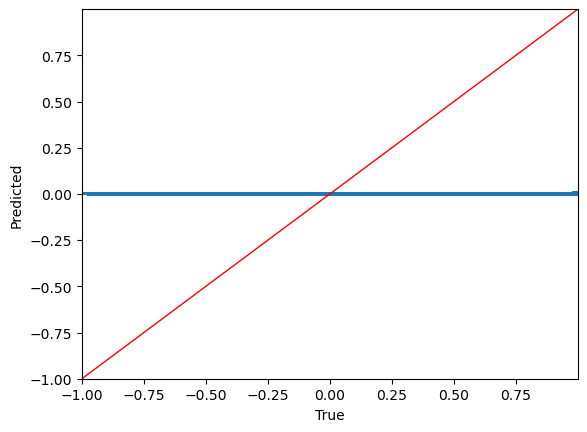

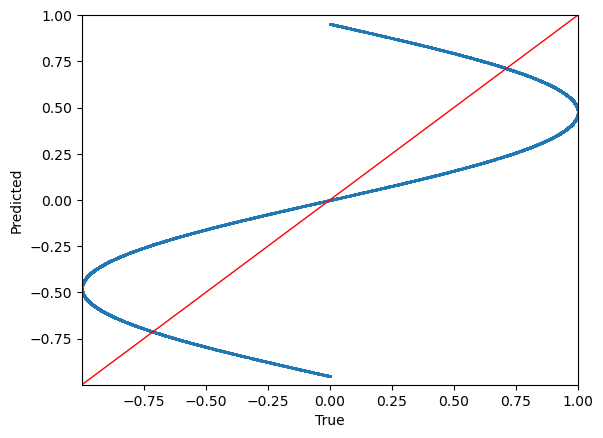

R2: [-1.19691136e-04  6.10808977e-01]


In [13]:
### Step 4: Validate the model

val_pred_denorm, rmse_val, r2_val = ValidateModel(model, 
                                                  inputs_val_norm, 
                                                  circ_val_norm, 
                                                  circ_tr_mean, 
                                                  circ_tr_stdev, 
                                                  batch_size, 
                                                  'LR_circ')

Loaded previously-trained model.
25/25 [==============================] - 0s 866us/step
Normalized RMSE: [0.0017703  0.00241551]


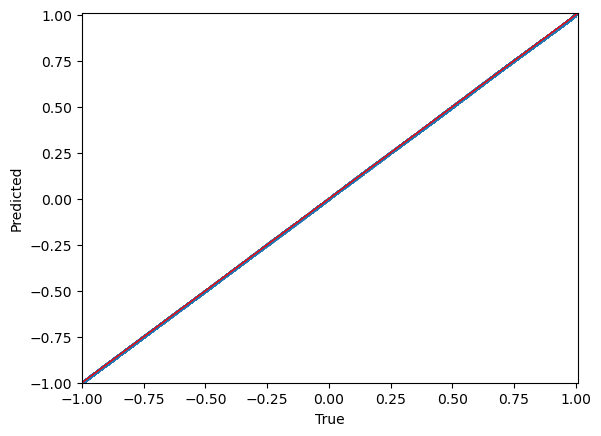

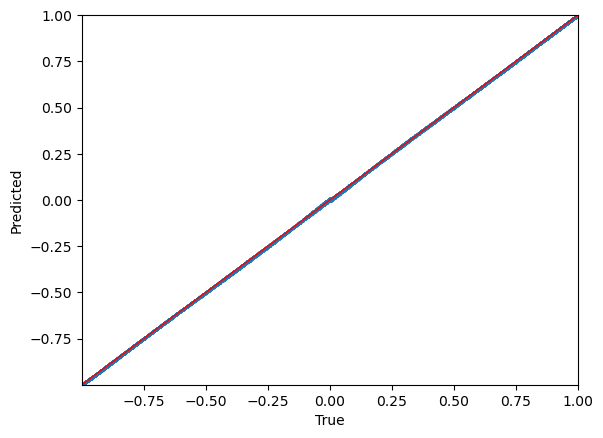

R2: [0.99999684 0.99999421]


In [14]:
# So, it does horribly, like we would expect -- this is not a linear problem
# Let's start adding layers and nodes:
layers = [64]
activ  = ['elu']
fname  = 'hidden1_64node_elu_circ'

model, val_pred_denorm, rmse_val, r2_val = \
                 TrainValArch(inputs_tr_norm,  circ_tr_norm, 
                              inputs_val_norm, circ_val_norm,
                              circ_tr_mean,    circ_tr_stdev, 
                              layers, activ, learnrate, 
                              batch_size, epochs, patience, fname)

17/17 [==============================] - 0s 890us/step
Normalized RMSE: [0.00173795 0.00242659]


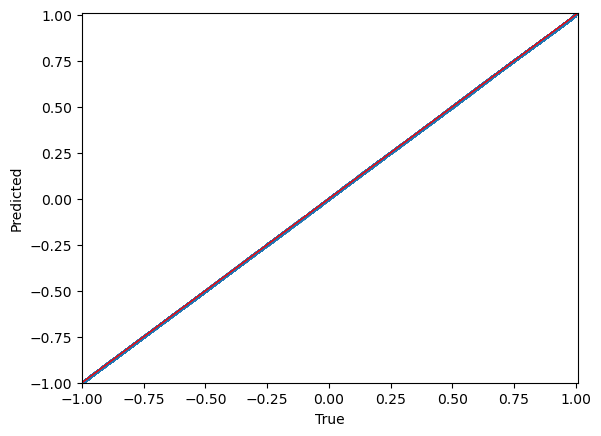

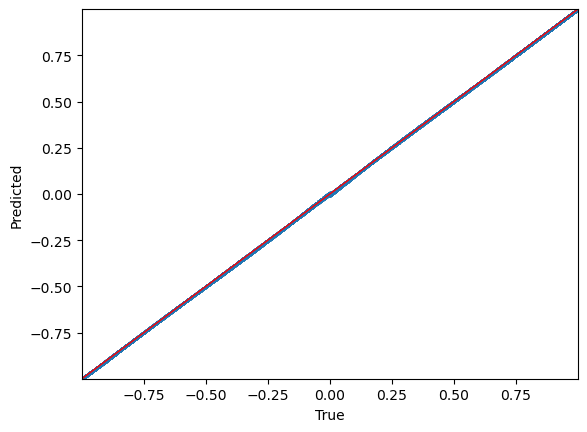

R2: [0.99999698 0.99999411]


In [15]:
# R^2 > 0.999 -- great model
### Step 5: Apply model to the test set
#   Note: We have a validated model that is 'good', 
#   but that doesn't mean it's a generalized model!  
#   This is why we run it on the test set, which it has not seen until now
te_pred_denorm, rmse_te, r2_te = TestModel(model, 
                                           inputs_te_norm, 
                                           circ_te_norm, 
                                           circ_tr_mean, 
                                           circ_tr_stdev, 
                                           batch_size, 
                                           fname)

32/32 [==============================] - 0s 856us/step


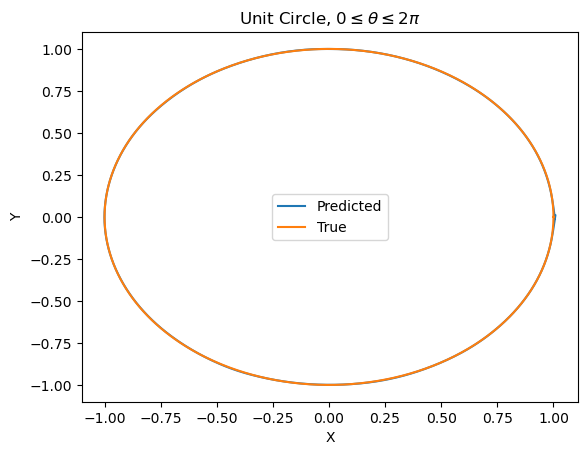

In [16]:
# The model generalized well, as expected
#Let's do some test cases!
# Test case 1: unit circle (what it was trained to do)
t1_n     = 1000
t1_theta = np.expand_dims(np.linspace(0, 2*np.pi, t1_n), -1)
# Analytical values
t1_true  = np.hstack([np.cos(t1_theta), np.sin(t1_theta)])
# Normalize input, predict, denormalize
t1_inp   = (t1_theta - inputs_tr_mean) / inputs_tr_stdev
t1_pred  = model.predict(t1_inp) * circ_tr_stdev + circ_tr_mean

# Plot it
plt.plot(t1_pred[:,0], t1_pred[:,1], label='Predicted')
plt.plot(t1_true[:,0], t1_true[:,1], label='True')
plt.title("Unit Circle, $0 \leq \\theta \leq 2\pi$")
plt.ylabel('Y')
plt.legend(loc='best')
plt.xlabel('X')
plt.savefig(fname+'_test_unitcircle_0-2pi.png', bbox_inches='tight')
plt.show()

32/32 [==============================] - 0s 851us/step


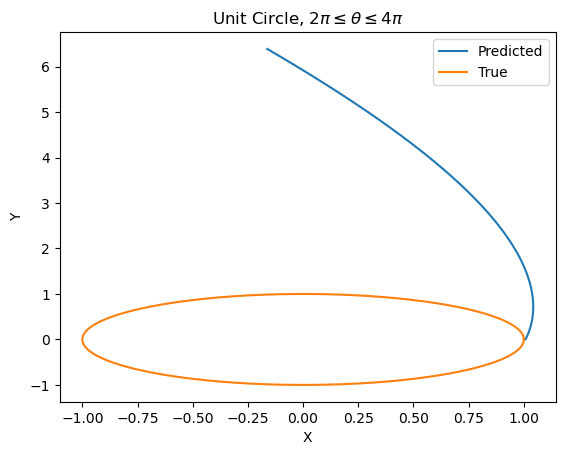

In [17]:
# Looks like a circle! That last predicted point seems slightly off, though
# What happens if we predict a circle from 2pi -- 4pi?
t2_theta = np.expand_dims(np.linspace(2*np.pi, 4*np.pi, t1_n), -1)
# Analytical values
t2_true  = np.hstack([np.cos(t2_theta), np.sin(t2_theta)])
# Normalize input, predict, denormalize
t2_inp   = (t2_theta - inputs_tr_mean) / inputs_tr_stdev
t2_pred  = model.predict(t2_inp) * circ_tr_stdev + circ_tr_mean

# Plot it
plt.plot(t2_pred[:,0], t2_pred[:,1], label='Predicted')
plt.plot(t2_true[:,0], t2_true[:,1], label='True')
plt.title("Unit Circle, $2\pi \leq \\theta \leq 4\pi$")
plt.ylabel('Y')
plt.legend(loc='best')
plt.xlabel('X')
plt.savefig(fname+'_test_unitcircle_2pi-4pi.png', bbox_inches='tight')
plt.show()

### Not so circular :)
This is why you cannot reliably apply ML models outside of the training space
But, if you know you have periodic behavior like this, then you could shift 
the inputs to be within the training space before predicting with the ML model

# Gaussian

In [85]:
def gaussian(x, mu=0., sigma=1., scale=1.):
    """
    Function to calculate a Gaussian.

    Inputs
    ------
    x    : array or float. Position(s) to calculate Gaussian.
    mu   : float. Mean value of Gaussian.
    sigma: float. Standard deviation of Gaussian.
    scale: float. Scaling factor.

    Outputs
    -------
    values: array or float. Value of the Gaussian at `x`.

    Example
    -------
    >>> gaussian(x=10, mu=10, sigma=1)
    0.3989422804014327

    >>> gaussian(x=1, mu=10, sigma=1)
    1.0279773571668917e-18

    >>> gaussian(x=1, mu=0, sigma=1)
    0.24197072451914337

    >>> gaussian(x=1, mu=0, sigma=100)
    0.003989223337860822

    Revisions
    ---------
    2019-11-05  Michael Himes           Initial implementation.
    """
    return scale/sigma/np.sqrt(2.*np.pi) * np.exp(-(1./2.) * ((x-mu)/sigma)**2)

In [86]:
### Step 1: Generate the data
np.random.seed(0)

# Set boundaries, number of samples
mulo   , muhi    = 30  , 50
sigmalo, sigmahi =  0.1, 10
nsamp            = 500000 # Decrease this for faster, less accurate training

# Make draws from random uniform distribution -- NN inputs
# We want a good selection of values, 
# not just values far from the mean (and therefore ~0)
# First, we pick mu and sigma. Then, we'll pick x based on those.
inputs      = np.zeros((nsamp, 3))
inputs[:,1] = np.random.uniform(mulo   , muhi   , nsamp)
inputs[:,2] = np.random.uniform(sigmalo, sigmahi, nsamp)
inputs[:,0] = inputs[:,1] + np.random.uniform(-3*inputs[:,2], 3*inputs[:,2])


# Calculate the Gaussian value for all cases -- NN outputs
gaus = gaussian(inputs[:,0], inputs[:,1], inputs[:,2])
# Making `gaus` into a 2D array for consistency
gaus = np.expand_dims(gaus, -1)

# Split `inputs` and `gaus` into training, validation, and test sets
ntr  = int(nsamp * 0.7)
nval = int(nsamp * 0.1)
nte  = int(nsamp * 0.2)

inputs_tr  = inputs[        :ntr         ]
inputs_val = inputs[ntr     :ntr+nval    ]
inputs_te  = inputs[ntr+nval:ntr+nval+nte]

gaus_tr  = gaus[        :ntr         ]
gaus_val = gaus[ntr     :ntr+nval    ]
gaus_te  = gaus[ntr+nval:ntr+nval+nte]

# Normalize the data based on the training data
inputs_tr_mean  = np.mean(inputs_tr, axis=0)
inputs_tr_stdev = np.std (inputs_tr, axis=0)

gaus_tr_mean  = np.mean(gaus_tr, axis=0)
gaus_tr_stdev = np.std (gaus_tr, axis=0)

inputs_tr_norm  = (inputs_tr  - inputs_tr_mean) / inputs_tr_stdev
inputs_val_norm = (inputs_val - inputs_tr_mean) / inputs_tr_stdev
inputs_te_norm  = (inputs_te  - inputs_tr_mean) / inputs_tr_stdev

gaus_tr_norm  = (gaus_tr  - gaus_tr_mean) / gaus_tr_stdev
gaus_val_norm = (gaus_val - gaus_tr_mean) / gaus_tr_stdev
gaus_te_norm  = (gaus_te  - gaus_tr_mean) / gaus_tr_stdev

In [87]:
### Step 2: Define the model
learnrate = 5e-3
# No hidden layers -- linear regression model
model = DenseNet(inputs.shape[-1], gaus_tr.shape[-1], learnrate=learnrate)

In [88]:
### Step 3: Train the model
epochs     = 1000
patience   = 30
batch_size = 1024

TrainModel(model, 
           inputs_tr_norm,  gaus_tr_norm, 
           inputs_val_norm, gaus_val_norm, 
           batch_size, epochs, patience, 'LR_gaus')

Loaded previously-trained model.


27/27 [==============================] - 0s 649us/step
Normalized RMSE: [0.94132866]


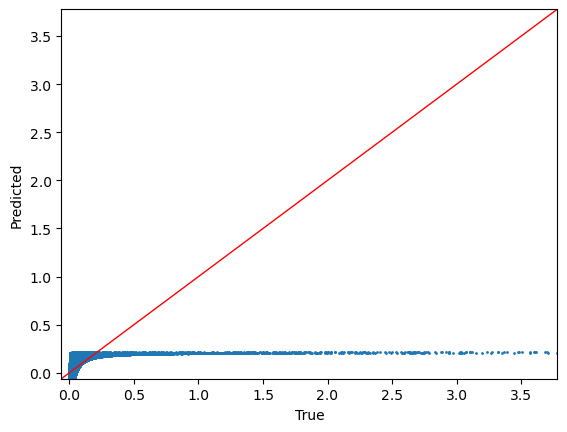

R2: [0.14452772]


In [89]:
### Step 4: Validate the model
val_pred_denorm, rmse_val, r2_val = ValidateModel(model, 
                                                  inputs_val_norm, 
                                                  gaus_val_norm, 
                                                  gaus_tr_mean, 
                                                  gaus_tr_stdev, 
                                                  batch_size, 
                                                  'LR_gaus')

Loaded previously-trained model.
27/27 [==============================] - 0s 677us/step
Normalized RMSE: [0.57123003]


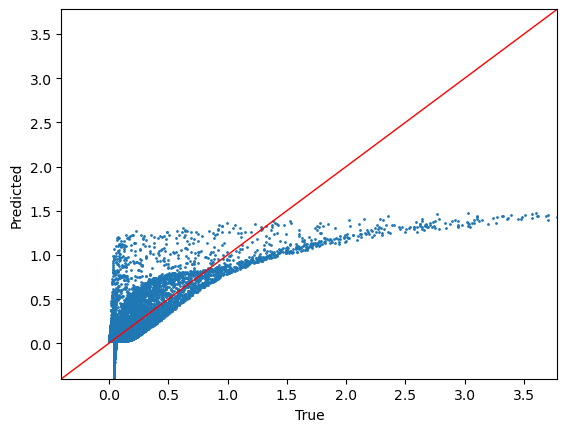

R2: [0.6849747]


In [90]:
# Well, that's disappointing...It predicts a horizontal line!
# Its error is usually ~1 sigma, and R^2 is basically 0!
# Dumb neural network...
# What does this mean? Well, it depends on the problem
# Here it means that the model is not complex enough to model the data.
# Let's try adding a hidden layer
layers = [4]
activ  = ['tanh']
fname  = 'hidden1_4node_tanh_gaus'

model, val_pred_denorm, rmse_val, r2_val = \
            TrainValArch(inputs_tr_norm,  gaus_tr_norm, 
                         inputs_val_norm, gaus_val_norm,
                         gaus_tr_mean,  gaus_tr_stdev, 
                         layers, activ, learnrate, 
                         batch_size, epochs, patience, fname)

### Well, it's better...kinda...but it's wrong for a lot of the cases! Why?

 Let's think about the problem at hand -- 
 the parameters are position, mean, and standard deviation.
 But, we can reduce the dimensionality of the problem to just 
 the position and standard deviation!
 If we have (x= 9, mu=10, sigma=10), this has the same values as 
            (x=-1, mu=0,  sigma=10)
 So, let's go back to the beginning and train on just x and sigma 
 by shifting x based on mu. 
 This may not fix all of our problems, but it will simplify training, 
 which should help it learn/generalize better

In [91]:
# Set the data
new_inputs      = np.zeros((nsamp, 2))
new_inputs[:,0] = inputs[:,0] - inputs[:,1] # x - mu
new_inputs[:,1] = inputs[:,2]               # sigma
# Calculate Gaussian values
new_gaus = gaussian(new_inputs[:,0], sigma=new_inputs[:,1])
new_gaus = np.expand_dims(new_gaus, -1)
# Split into training, validation, test sets
new_inputs_tr  = new_inputs[        :ntr         ]
new_inputs_val = new_inputs[ntr     :ntr+nval    ]
new_inputs_te  = new_inputs[ntr+nval:ntr+nval+nte]
new_gaus_tr    = new_gaus  [        :ntr         ]
new_gaus_val   = new_gaus  [ntr     :ntr+nval    ]
new_gaus_te    = new_gaus  [ntr+nval:ntr+nval+nte]
# Normalize
new_inputs_tr_mean  = np.mean(new_inputs_tr, axis=0)
new_inputs_tr_stdev = np.std (new_inputs_tr, axis=0)
new_gaus_tr_mean    = np.mean(new_gaus_tr,   axis=0)
new_gaus_tr_stdev   = np.std (new_gaus_tr,   axis=0)
new_inputs_tr_norm  = (new_inputs_tr  - new_inputs_tr_mean) / new_inputs_tr_stdev
new_inputs_val_norm = (new_inputs_val - new_inputs_tr_mean) / new_inputs_tr_stdev
new_inputs_te_norm  = (new_inputs_te  - new_inputs_tr_mean) / new_inputs_tr_stdev
new_gaus_tr_norm    = (new_gaus_tr    - new_gaus_tr_mean)   / new_gaus_tr_stdev
new_gaus_val_norm   = (new_gaus_val   - new_gaus_tr_mean)   / new_gaus_tr_stdev
new_gaus_te_norm    = (new_gaus_te    - new_gaus_tr_mean)   / new_gaus_tr_stdev

Loaded previously-trained model.
27/27 [==============================] - 0s 655us/step
Normalized RMSE: [0.59437254]


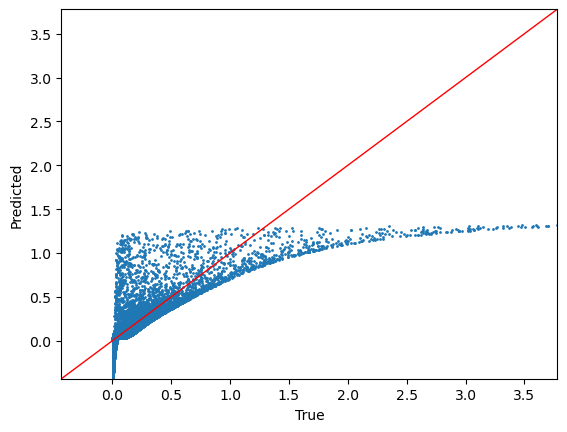

R2: [0.6589321]


In [92]:
# Run it through the previous model architecture
fname = 'hidden1_4node_tanh_gaus-shift'
model, val_pred_denorm, rmse_val, r2_val = \
                   TrainValArch(new_inputs_tr_norm,  new_gaus_tr_norm, 
                                new_inputs_val_norm, new_gaus_val_norm,
                                new_gaus_tr_mean,    new_gaus_tr_stdev, 
                                layers, activ, learnrate, 
                                batch_size, epochs, patience, fname)

### Well, that didn't make much of a difference...but that's okay. 
 We now have a better way to represent our data (fewer inputs)
 Let's make things more complex -- add more nodes!

Loaded previously-trained model.
27/27 [==============================] - 0s 663us/step
Normalized RMSE: [0.32778476]


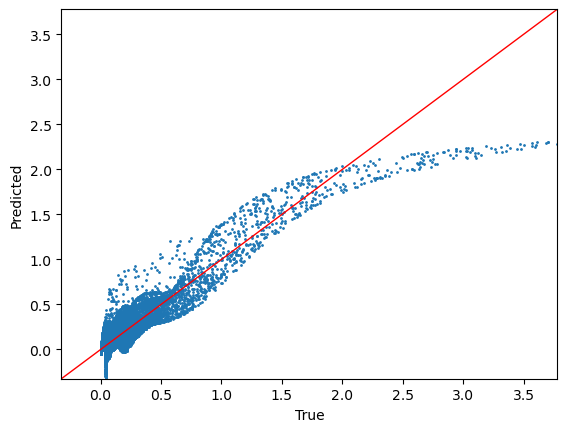

R2: [0.89627083]


In [93]:
layers = [16]
activ  = ['tanh']
fname  = 'hidden1_16node_tanh_gaus-shift'

model, val_pred_denorm, rmse_val, r2_val = \
                   TrainValArch(new_inputs_tr_norm,  new_gaus_tr_norm, 
                                new_inputs_val_norm, new_gaus_val_norm,
                                new_gaus_tr_mean,    new_gaus_tr_stdev, 
                                layers, activ, learnrate, 
                                batch_size, epochs, patience, fname)

Loaded previously-trained model.
27/27 [==============================] - 0s 885us/step
Normalized RMSE: [0.23034731]


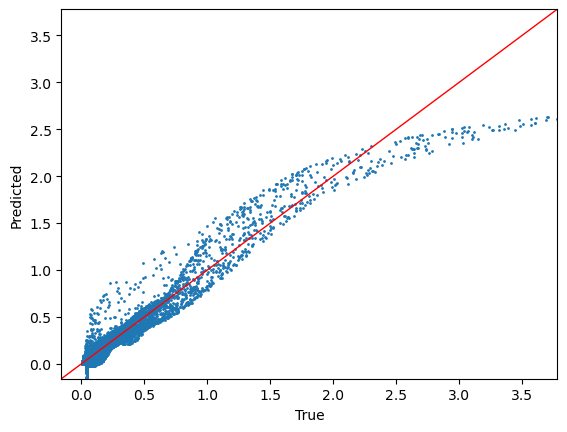

R2: [0.94877409]


In [94]:
# Now that looks a lot better! Still some error, esp. for larger values
# Let's see if we can improve that -- more nodes?
layers = [64]
activ  = ['tanh']
fname  = 'hidden1_64node_tanh_gaus-shift'

model, val_pred_denorm, rmse_val, r2_val = \
                   TrainValArch(new_inputs_tr_norm,  new_gaus_tr_norm, 
                                new_inputs_val_norm, new_gaus_val_norm,
                                new_gaus_tr_mean,    new_gaus_tr_stdev, 
                                layers, activ, learnrate, 
                                batch_size, epochs, patience, fname)

Loaded previously-trained model.
27/27 [==============================] - 0s 684us/step
Normalized RMSE: [0.03374194]


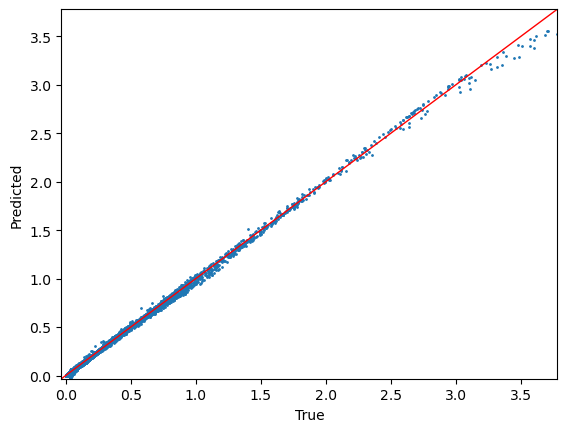

R2: [0.99890083]


In [95]:
# Small improvement, but still not as good as we would like...
# Let's try adding a second hidden layer! 
# We'll use a sigmoid activation function
# This smoothly spans [0, 1], which is perfect for probability functions
#  Note: For most problems, there are better choices for activation functions!
learnrate = 1e-3
layers    = [16, 16]
activ     = ['tanh', 'sigmoid']
fname     = 'hidden2_16-16node_tanh-sig_gaus-shift'

model, val_pred_denorm, rmse_val, r2_val = \
                   TrainValArch(new_inputs_tr_norm,  new_gaus_tr_norm, 
                                new_inputs_val_norm, new_gaus_val_norm,
                                new_gaus_tr_mean,    new_gaus_tr_stdev, 
                                layers, activ, learnrate, 
                                batch_size, epochs, patience, fname)

Loaded previously-trained model.
27/27 [==============================] - 0s 721us/step
Normalized RMSE: [0.00576318]


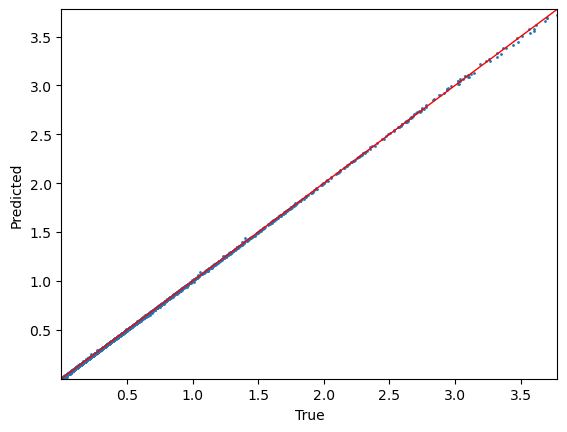

R2: [0.99996793]


In [96]:
# This looks good -- R^2 ~ 0.99!
# Let's see if we can get R^2 above 0.999
# Let's try adding more nodes and another layer
layers = [64, 64, 64]
activ  = ['tanh', 'sigmoid', 'sigmoid']
fname  = 'hidden3_64-64-64node_tanh-sig-sig_gaus-shift'

model, val_pred_denorm, rmse_val, r2_val = \
                   TrainValArch(new_inputs_tr_norm,  new_gaus_tr_norm, 
                                new_inputs_val_norm, new_gaus_val_norm,
                                new_gaus_tr_mean,    new_gaus_tr_stdev, 
                                layers, activ, learnrate, 
                                batch_size, epochs, patience, fname)

21/21 [==============================] - 0s 708us/step
Normalized RMSE: [0.00535283]


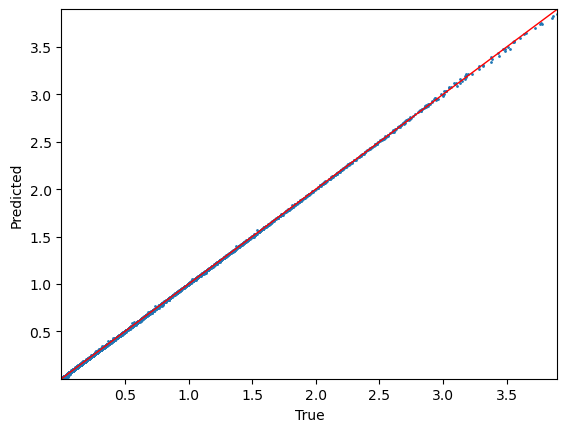

R2: [0.99997165]


In [97]:
# Now that we have a good model, let's continue...
### Step 5: Apply model to the test set
te_pred_denorm, rmse_te, r2_te = TestModel(model, 
                                           new_inputs_te_norm, 
                                           new_gaus_te_norm, 
                                           new_gaus_tr_mean, 
                                           new_gaus_tr_stdev, 
                                           batch_size, 
                                           fname)

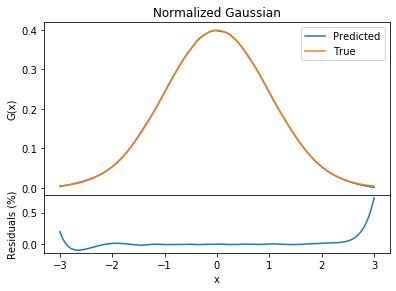

In [38]:
# The model generalized well!
# (Of course, we expect this since the data was generated in the same manner)

# Let's draw some Gaussians!
# First: a normalized Gaussian over [-3, 3]
ng_x   = np.linspace(-3, 3, 1001)
ng_mu  = np.zeros(1001)
ng_sig = np.ones (1001)

# Analytical Gaussian corresponding to these inputs
normgaus_true = gaussian(ng_x) # Note that function defaults to mu=0, sigma=1

# Normalize inputs and predict
ng_inp         = np.vstack([ng_x-ng_mu, ng_sig]).T
ng_inp         = (ng_inp - new_inputs_tr_mean) / new_inputs_tr_stdev
normgaus_pred  = model.predict(ng_inp)[:,0] #2D-->1D
# Denormalize predictions
normgaus_pred *= new_gaus_tr_stdev 
normgaus_pred += new_gaus_tr_mean

# Plot it
fig1   = plt.figure(1)
frame1 = fig1.add_axes((.1, .3, .8, .6))
plt.plot(ng_x, normgaus_pred, label='Predicted')
plt.plot(ng_x, normgaus_true, label='True')
plt.title("Normalized Gaussian")
plt.ylabel('G(x)')
plt.legend(loc='best')
frame1.set_xticklabels([])
frame2 = fig1.add_axes((.1, .1, .8, .2))
plt.plot(ng_x, (normgaus_true - normgaus_pred) / normgaus_true)
plt.ylabel('Residuals (%)')
plt.xlabel('x')
plt.savefig('plots/'+fname+'_test_normgaus.png', bbox_inches='tight')
plt.show()

32/32 [==============================] - 0s 720us/step


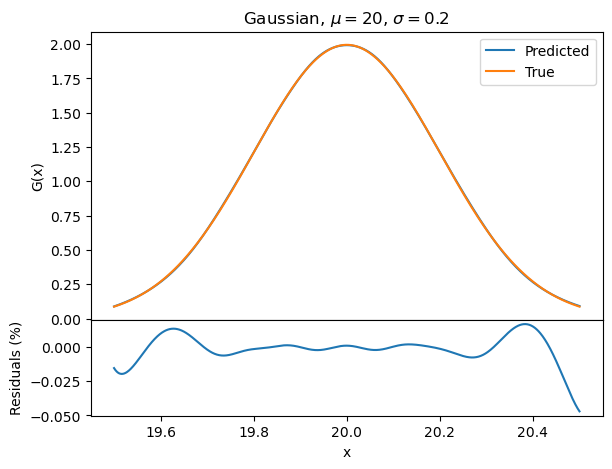

In [98]:
# Looks pretty good
# Let's try 2 more cases and see how it does.
# Case 1: small sigma case, with mu!=0
sg_x   = np.linspace(19.5, 20.5, 1001)
sg_mu  = np.zeros(1001) + 20
sg_sig = np.ones (1001) * 0.2

# Analytical Gaussian corresponding to these inputs
smallgaus_true = gaussian(sg_x, sg_mu, sg_sig)

# Normalize inputs and predict
sg_inp          = np.vstack([sg_x-sg_mu, sg_sig]).T
sg_inp          = (sg_inp - new_inputs_tr_mean) / new_inputs_tr_stdev
smallgaus_pred  = model.predict(sg_inp)[:,0] #2D-->1D
# Denormalize predictions
smallgaus_pred *= new_gaus_tr_stdev 
smallgaus_pred += new_gaus_tr_mean


# Plot it
fig1   = plt.figure(1)
frame1 = fig1.add_axes((.1, .3, .8, .6))
plt.plot(sg_x, smallgaus_pred, label='Predicted')
plt.plot(sg_x, smallgaus_true, label='True')
plt.title("Gaussian, $\mu = 20$, $\sigma = 0.2$")
plt.ylabel('G(x)')
plt.legend(loc='best')
frame1.set_xticklabels([])
frame2 = fig1.add_axes((.1, .1, .8, .2))
plt.plot(sg_x, (smallgaus_true - smallgaus_pred) / smallgaus_true)
plt.ylabel('Residuals (%)')
plt.xlabel('x')
plt.savefig('plots/'+fname+'_test_smallgaus.png', bbox_inches='tight')
plt.show()

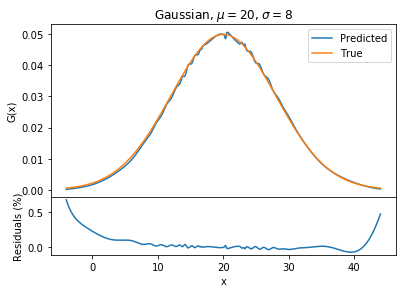

In [40]:
# Looks pretty good

# Case 2: let's try something with more uncertainty
wg_x   = np.linspace(-4, 44, 1001)
wg_mu  = np.zeros(1001) + 20
wg_sig = np.ones (1001) * 8

# Analytical Gaussian corresponding to these inputs
widegaus_true = gaussian(wg_x, wg_mu, wg_sig)

# Normalize inputs and predict
wg_inp         = np.vstack([wg_x-wg_mu, wg_sig]).T
wg_inp         = (wg_inp - new_inputs_tr_mean) / new_inputs_tr_stdev
widegaus_pred  = model.predict(wg_inp)[:,0] #2D-->1D
# Denormalize predictions
widegaus_pred *= new_gaus_tr_stdev 
widegaus_pred += new_gaus_tr_mean


# Plot it
fig1   = plt.figure(1)
frame1 = fig1.add_axes((.1, .3, .8, .6))
plt.plot(wg_x, widegaus_pred, label='Predicted')
plt.plot(wg_x, widegaus_true, label='True')
plt.title("Gaussian, $\mu = 20$, $\sigma = 8$")
plt.ylabel('G(x)')
plt.legend(loc='best')
frame1.set_xticklabels([])
frame2 = fig1.add_axes((.1, .1, .8, .2))
plt.plot(wg_x, (widegaus_true - widegaus_pred) / widegaus_true)
plt.ylabel('Residuals (%)')
plt.xlabel('x')
plt.savefig('plots/'+fname+'_test_widegaus.png', bbox_inches='tight')
plt.show()

In [41]:
# Not so good. This goes to show that even if the model does well in general, 
# you shouldn't trust it in all cases. ML is only as good as the data/model.
# How can we improve the performance?
# We can modify the model architecture and/or use more data